# Desafío Telecom X


## El desafío Telecom X aplicación de habilidades esenciales de análisis de datos en un escenario de negocios real.

##  Aplicación práctica del conocimiento
* La limpieza y tratamiento de datos es una habilidad fundamental para cualquier analista de datos. La manipulación de grandes volúmenes de información exige la capacidad de identificar y corregir inconsistencias en los datos, como valores nulos, duplicados y datos fuera de estándar. Garantizar que los datos estén listos para el análisis es un paso esencial para obtener resultados precisos y confiables.

* El análisis exploratorio de datos (EDA) es una etapa crucial para comprender en profundidad los datos. La capacidad de aplicar estadísticas descriptivas y generar visualizaciones permite identificar patrones, tendencias y relaciones entre las variables. Esto ayuda a formular hipótesis y generar insights que pueden influir en decisiones estratégicas dentro de la empresa.

* Al participar en este desafío, aplicarás conocimientos esenciales para el análisis de grandes volúmenes de datos en un contexto real, donde tus hallazgos podrán impactar directamente en las estrategias de la empresa para mejorar el principal problema que están enfrentando.

* Este desafío no solo contribuye a tu crecimiento en el área de Data Science, sino que también ofrece la oportunidad de entender cómo la ciencia de datos puede aplicarse para resolver problemas reales que enfrentan las empresas en el mercado.


# Fases

## Extracción

### Extraer y convertir los datos a un Data Frame de Pandas

In [598]:
import pandas as pd
# Para leer el archivo directamente de GitHub, se utiliza la raw URL
datos = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json')
# Para leerlo desde gDrive personal
#datos = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Visualización de datos con Python/Challenge  - Telecom X/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [599]:
# Verificación de los tipos de datos
datos.info()
# Las columnas desde la 2 a la 5 poseen datos anidados según la verificación visual

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [600]:
# Verificación de valores nulos
datos.isnull().sum()
# El set de datos no posee valores nulos

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [601]:
# Las dos columnas iniciales 'customerID' y 'Churn' poseen datos sin anidar y se extraen del resto consultándolas con datos[['customerID','Churn']]
# y signandolas a un data frame de nombre datos_C0C1 donde, C0 y C1 corresponden a las dos columnas iniciales

datos_C0C1 = datos[['customerID','Churn']]

# Las columnas anidadas van de la posicón 2 a la 5 ('customer', 'phone', 'internet', 'account')
# Estos datos se extraen por separado consultando cada columna y asignándola a un data frame de nombre omónimo
# y se normalizan en la misma instrucción con la función pd.json_normalize ( datos_columna=pd.json_normalize(datos['columna']) )

datos_customer=pd.json_normalize(datos['customer'])
datos_phone=pd.json_normalize(datos['phone'])
datos_internet=pd.json_normalize(datos['internet'])
datos_account=pd.json_normalize(datos['account'])


In [602]:
# Los data frames datos_C0C1, datos_customer, datos_phone, datos_internet, datos_account se unen en un data frame de nombre datos_normalizados con la función pd.concat
datos_normalizados = pd.concat([datos_C0C1, datos_customer, datos_phone, datos_internet, datos_account], axis=1)
datos_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [603]:
# Se ajustan los índices
datos_normalizados.reset_index(drop=True, inplace=True)
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Comprobación de incoherencias en los datos

#### Valores nulos

In [604]:
# Verificación de valores nulos
datos_normalizados.isnull().sum()
# No existen valores nulos en el set de datos

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


#### Valores únicos

In [605]:
# Columna customerID
vu=datos_normalizados['customerID'].unique()
print(len(vu))
print(vu)
# La cantidad de datos en la columna coincide con la cantidad de filas. No se aprecian inconsistencias ni valores duplicados
# Verificar sí la porción numérica puede se considerada comocustomerID validando también lo repetible de la porción alfanumérica

7267
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']


In [606]:
# Columna Churn
vu=datos_normalizados['Churn'].unique()
print(len(vu))
print(vu)
datos_normalizados.query("Churn == ''")
# Existen 224 filas que no poseen valor en la columna Churn. Dejarlos complicaría el análisis en cualquier modelo porque,
# no poseemos información que justifique asignarles uno de los valores aceptados o que podamos deducir del resto de los datos.
# Se eliminaran las 224 filas con valores faltantes pues representan el 3.08%, lo cual es aceptable.
# Se convertira la columna Churn a numérica y, los valores No y Yes a 0 y 1 respectivamente.

3
['No' 'Yes' '']


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [607]:
# Columna gender
vu=datos_normalizados['gender'].unique()
print(len(vu))
print(vu)
# Los valores obtenidos corresponden con lo esperado.
# Se convertirá la columna a numérica y, los valores Male y Female a 0 y 1 respectivamente

2
['Female' 'Male']


In [608]:
# Columna SeniorCitizen
vu=datos_normalizados['SeniorCitizen'].unique()
print(len(vu))
print(vu)
# Los valores obtenidos corresponden con lo esperado

2
[0 1]


In [609]:
# Columna Partner
vu=datos_normalizados['Partner'].unique()
print(len(vu))
print(vu)
# Los valores obtenidos corresponden con lo esperado
# Se convertira la columna a numérica y, los valores No y Yes a 0 y 1 respectivamente

2
['Yes' 'No']


In [610]:
# Columna Dependents
vu=datos_normalizados['Dependents'].unique()
print(len(vu))
print(vu)
# Los valores obtenidos corresponden con lo esperado
# Se convertira la columna a numérica y, los valores No y Yes a 0 y 1 respectivamente

2
['Yes' 'No']


In [611]:
# Columna tenure
vu=datos_normalizados['tenure'].unique()
print(len(vu))
print(vu)
# Existen 73 valores únicos y el resto son duplicados, pero es una columna en la que pueden repetirse la cantidad de meses de
# contrato y los valores iguales a cero indican que los contratos no han llegado al primer mes

73
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]


In [612]:
# Columna PhoneService
vu=datos_normalizados['PhoneService'].unique()
print(len(vu))
print(vu)
# Los valores obtenidos corresponden con lo esperado
# Se convertira la columna a numéricay, los valores No y Yes a 0 y 1 respectivamente

2
['Yes' 'No']


In [613]:
# Columna MultipleLines
vu=datos_normalizados['MultipleLines'].unique()
print(len(vu))
print(vu)
# Verificar sí los registros con "No phone service" coinciden con lo indicado en la columna PhoneService
print(datos_normalizados.query("PhoneService == 'Yes' & MultipleLines == 'No phone service'"))
# La consulta anterior indica que todos los registros con el valor "No phone service" en la columna MultipleLinesn no tienen
# servicio telefónico, por lo que podemos inferir que "No" y "No phone service" tienen el mismo sentido en la columna MultipleLines.
# Asignar a los registros con el valor No phone service el valor No.
# Se convertira la columna a numérica y, los valores No y Yes a 0 y 1 respectivamente

3
['No' 'Yes' 'No phone service']
Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [614]:
# Columna InternetService
vu=datos_normalizados['InternetService'].unique()
print(len(vu))
print(vu)
# Los valores obtenidos corresponden con lo esperado

3
['DSL' 'Fiber optic' 'No']


In [615]:
# Columna OnlineSecurity
vu=datos_normalizados['OnlineSecurity'].unique()
print(len(vu))
print(vu)
# Verificar sí los registros con No internet service coinciden con lo indicado en la columna InternetService
print(datos_normalizados.query("InternetService == 'Yes' & OnlineSecurity == 'No internet service'"))
# La consulta anterior indica que todos los registros con el valor "No internet service" en la columna OnlineSecurity no tienen
# servicio de internet, por lo que podemos inferir que "No" y "No internet service" tienen el mismo sentido en la columna OnlineSecurity.
# Asignar a los registros con el valor No phone service el valor No.# Asignar a los registros con el valor No internet service el valor No
# Se convertira la columna a numérica y, los valores No y Yes a 0 y 1 respectivamente

3
['No' 'Yes' 'No internet service']
Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [616]:
# Columna OnlineBackup
vu=datos_normalizados['OnlineBackup'].unique()
print(len(vu))
print(vu)
# Verificar sí los registros con No internet service coinciden con lo indicado en la columna InternetService
print(datos_normalizados.query("InternetService == 'Yes' & OnlineBackup == 'No internet service'"))
# # La consulta anterior indica que todos los registros con el valor "No internet service" en la columna OnlineBackup no tienen
# servicio de internet, por lo que podemos inferir que "No" y "No internet service" tienen el mismo sentido en la columna OnlineBackup.
# Asignar a los registros con el valor No internet service el valor No
# Se convertira la columna a numérica y, los valores No y Yes a 0 y 1 respectivamente

3
['Yes' 'No' 'No internet service']
Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [617]:
# Columna DeviceProtetion
vu=datos_normalizados['DeviceProtection'].unique()
print(len(vu))
print(vu)
# Verificar sí los registros con No internet service coinciden con lo indicado en la columna InternetService
print(datos_normalizados.query("InternetService == 'Yes' & DeviceProtection == 'No internet service'"))
# La consulta anterior indica que todos los registros con el valor "No internet service" en la columna DeviceProtetion no tienen
# servicio de internet, por lo que podemos inferir que "No" y "No internet service" tienen el mismo sentido en la columna DeviceProtetion.
# Asignar a los registros con el valor No internet service el valor No
# Se convertira la columna a numérica y, los valores No y Yes a 0 y 1 respectivamente

3
['No' 'Yes' 'No internet service']
Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [618]:
# Columna TechSupport
vu=datos_normalizados['TechSupport'].unique()
print(len(vu))
print(vu)
# Verificar sí los registros con No internet service coinciden con lo indicado en la columna InternetService
print(datos_normalizados.query("InternetService == 'Yes' & TechSupport == 'No internet service'"))
# La consulta anterior indica que todos los registros con el valor "No internet service" en la columna TechSupport no tienen
# servicio de internet, por lo que podemos inferir que "No" y "No internet service" tienen el mismo sentido en la columna TechSupport.
# Asignar a los registros con el valor No internet service el valor No
# Se convertira la columna a numérica y, los valores No y Yes a 0 y 1 respectivamente.

3
['Yes' 'No' 'No internet service']
Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [619]:
# Columna StreamingTV
vu=datos_normalizados['StreamingTV'].unique()
print(len(vu))
print(vu)
# Verificar sí los registros con No internet service coinciden con lo indicado en la columna InternetService
print(datos_normalizados.query("InternetService == 'Yes' & StreamingTV == 'No internet service'"))
# La consulta anterior indica que todos los registros con el valor "No internet service" en la columna StreamingTV no tienen
# servicio de internet, por lo que podemos inferir que "No" y "No internet service" tienen el mismo sentido en la columna StreamingTV.
# Asignar a los registros con el valor No internet service el valor No
# Se convertira la columna a numérica y, los valores No y Yes a 0 y 1 respectivamente

3
['Yes' 'No' 'No internet service']
Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [620]:
# Columna StreamingMovies
vu=datos_normalizados['StreamingMovies'].unique()
print(len(vu))
print(vu)
# Verificar sí los registros con No internet service coinciden con lo indicado en la columna InternetService
print(datos_normalizados.query("InternetService == 'Yes' & StreamingMovies == 'No internet service'"))
# La consulta anterior indica que todos los registros con el valor "No internet service" en la columna StreamingMovies no tienen
# servicio de internet, por lo que podemos inferir que "No" y "No internet service" tienen el mismo sentido en la columna StreamingMovies.
# Asignar a los registros con el valor No internet service el valor No
# Se convertira la columna a numérica y, los valores No y Yes a 0 y 1 respectivamente

3
['No' 'Yes' 'No internet service']
Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


In [621]:
# Columna Contract
vu=datos_normalizados['Contract'].unique()
print(len(vu))
print(vu)
# Los valores obtenidos coinciden con lo esperado

3
['One year' 'Month-to-month' 'Two year']


In [622]:
# Columna PaperlessBilling
vu=datos_normalizados['PaperlessBilling'].unique()
print(len(vu))
print(vu)
# Los valores obtenidos coinciden con lo esperado.
# Se convertira la columna a numérica y, los valores No y Yes a 0 y 1 respectivamente.

2
['Yes' 'No']


In [623]:
# Columna PaymentMethod
vu=datos_normalizados['PaymentMethod'].unique()
print(len(vu))
print(vu)
# Los valores obtenidos coinciden con lo esperado

4
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [624]:
# Columna Charges.Monthly
vu=datos_normalizados['Charges.Monthly'].unique()
print(len(vu))
print(vu)
# Existen 1585 valores únicos. El resto son valores repetidos, pero este campo puede tenerlos

1585
[65.6  59.9  73.9  ... 91.75 68.8  67.85]


In [625]:
# Columna Charges.Total
vu=datos_normalizados['Charges.Total'].unique()
print(len(vu))
print(vu)
# Existen 6531 valores únicos. El resto son valores repetidos, pero este campo puede tenerlos.
# La columna Chrages.Total debe tratarse como una columna con datos númericos

6531
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [626]:
# Existen 11 filas con valor igual a 0 en la columna Charges.Total, como esta columna es un acumulado, solo sí,
# el contrato no llega al mes, indicaría que no se ha realizado el primer cargo y cobro por servicios y que el valor 0 es correcto.
# La consulta muestra que los 11 registros con valor 0 en el campo tenure, coinciden con los 11 registros con valor 0
# en el campo Charges.Total.
print(datos_normalizados.query('tenure == 0')[['customerID', 'Charges.Total']])
print(datos_normalizados.query('`Charges.Total` == 0')[['customerID', 'tenure']])

      customerID Charges.Total
975   1371-DWPAZ              
1775  2520-SGTTA              
1955  2775-SEFEE              
2075  2923-ARZLG              
2232  3115-CZMZD              
2308  3213-VVOLG              
2930  4075-WKNIU              
3134  4367-NUYAO              
3203  4472-LVYGI              
4169  5709-LVOEQ              
5599  7644-OMVMY              
Empty DataFrame
Columns: [customerID, tenure]
Index: []


In [627]:
datos_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#### Verificación de patrones

In [628]:
# La columna customerID no posee valores con longitudes distintas
datos_normalizados['customerID'].str.len().nunique() == 1

True

In [629]:
print(datos_normalizados['customerID'].str.split('-').str[0].str.len().sum()/len(datos_normalizados))
print(datos_normalizados['customerID'].str.split('-').str[1].str.len().sum()/len(datos_normalizados))
# El código anterior indica que el customerID está formado por dos datos separados por '-'. La primer aparte corresponde a un valor
# que solo posee dígitos en una cadena de caracteres de 4 posiciones y la segunda a una cadena de caracteres de 5 posiciones.
# Se verificará que información adicional puede ofrecer estas informaciones por separado.

4.0
5.0


In [630]:
# Extrae las primeras cuatro posiciones
df0 = datos_normalizados['customerID'].str.split('-').str[0]
df0

,customerID
0,0002
1,0003
2,0004
3,0011
4,0013
...,...
7262,9987
7263,9992
7264,9992
7265,9993


In [631]:
# Esta validación indica que existen 5194 valores únicos
vu = df0.unique()
print('Cantidad de valores únicos\n',len(vu))
print('\nCantidad de registros con valores repetidos\n', len(df0)-len(vu))
print('\nValores únicos',vu)
print('\nValores repetidos\n', df0[df0.duplicated(keep=False)])

Cantidad de valores únicos
 5194

Cantidad de registros con valores repetidos
 2073

Valores únicos ['0002' '0003' '0004' ... '9992' '9993' '9995']

Valores repetidos
 4       0013
5       0013
6       0013
10      0017
11      0017
        ... 
7254    9972
7256    9975
7257    9975
7263    9992
7264    9992
Name: customerID, Length: 3698, dtype: object


In [632]:
# Verificación de los datos con los registros que inician con '0013' y '0017' en customerID
datos_normalizados[datos_normalizados['customerID'].str.startswith('0013', na=False)]


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.4,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.7,7904.25


In [633]:
datos_normalizados[datos_normalizados['customerID'].str.startswith('0017', na=False)]
# La información pareciera indicar que son miembros de un grupo relacionados de alguna forma, que adquieren los servicios por separado
# En ellos y en los demas registros varían los valores de la segunda porción de 5 caracteres.

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
10,0017-DINOC,No,Male,0,No,No,54,No,No phone service,DSL,...,No,No,Yes,Yes,No,Two year,No,Credit card (automatic),45.2,2460.55
11,0017-IUDMW,No,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.8,8456.75


In [634]:
# Extrae las cinco últimas posiciones
df1 = datos_normalizados['customerID'].str.split('-').str[1]
df1

,customerID
0,ORFBO
1,MKNFE
2,TLHLJ
3,IGKFF
4,EXCHZ
...,...
7262,LUTYD
7263,RRAMN
7264,UJOEL
7265,LHIEB


In [635]:
vu = df1.unique()
print('Cantidad de valores únicos\n',len(vu))
print('\nCantidad de registros con valores repetidos\n', len(df1)-len(vu))
print('\nValores únicos',vu)
print('\nValores repetidos\n', df1[df1.duplicated(keep=False)])
# Ninguno de los valores repetidos, corresponden a un mismo grupo

Cantidad de valores únicos
 7264

Cantidad de registros con valores repetidos
 3

Valores únicos ['ORFBO' 'MKNFE' 'TLHLJ' ... 'UJOEL' 'LHIEB' 'HOTOH']

Valores repetidos
 1021    CYWMH
1646    GSODA
2088    VUVJN
3195    CYWMH
6155    GSODA
6185    VUVJN
Name: customerID, dtype: object


In [636]:
# Verificar registros donde el customerID termine en los valores repetidos para la segunda porción ('CYWMH', 'GSODA', 'VUVJN')
datos_normalizados[datos_normalizados['customerID'].str.endswith('CYWMH', na=False)]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1021,1431-CYWMH,No,Female,0,Yes,Yes,22,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.05,454.05
3195,4462-CYWMH,No,Male,1,Yes,No,62,Yes,Yes,Fiber optic,...,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.80,5629.55


In [637]:
datos_normalizados[datos_normalizados['customerID'].str.endswith('GSODA', na=False)]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
1646,2335-GSODA,No,Male,0,No,Yes,23,No,No phone service,DSL,...,No,Yes,Yes,No,No,Two year,No,Mailed check,40.1,857.75
6155,8417-GSODA,No,Male,0,Yes,Yes,28,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,One year,No,Bank transfer (automatic),92.2,2568.15


In [638]:
datos_normalizados[datos_normalizados['customerID'].str.endswith('VUVJN', na=False)]
# No parece haber relación entre los valores repetidos para la segunda porción

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2088,2931-VUVJN,No,Female,1,Yes,No,59,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,No,No,One year,Yes,Electronic check,94.05,5483.9
6185,8473-VUVJN,Yes,Male,1,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,73.65,73.65


La estructura xxxx-yyyyy del customerID, podría sugerir la existencia de un código de sucursal o de un código de cliente padre, en el que se anidan contratos.

No aporta valor al análisis sí no se  transforman en valores separados, pero no podemos asegurar o inferir el significado de las partes sin más información.

El campo customerID se manejara como se presenta en el data set.

## Transformación

In [639]:
# Renombrar columnas para una mejor legibilidad, consistencia, evitar errores y favorecer la lectura en el modelado.
# Se usará entonces, nombres más cortos y claros, letras minúsculas y guiones bajos para separar palabras,
# sin espacios, puntos o mayúsculas

datos_normalizados.rename(columns={
    'customerID': 'customer_id',
    'Churn': 'churn',
    'SeniorCitizen': 'senior_citizen',
    'Partner': 'partner',
    'Dependents': 'dependents',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    "Contract": "contract",
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Charges.Monthly': 'monthly_charges',
    'Charges.Total': 'total_charges'
}, inplace=True)
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7267 non-null   object 
 1   churn              7267 non-null   object 
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   object 
 5   dependents         7267 non-null   object 
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   object 
 8   multiple_lines     7267 non-null   object 
 9   internet_service   7267 non-null   object 
 10  online_security    7267 non-null   object 
 11  online_backup      7267 non-null   object 
 12  device_protection  7267 non-null   object 
 13  tech_support       7267 non-null   object 
 14  streaming_tv       7267 non-null   object 
 15  streaming_movies   7267 non-null   object 
 16  contract           7267 

In [640]:
datos_normalizados

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [641]:
# Columna churn
# Se eliminan 224 filas cuyo valor en esta columna es igual a '. De 7267 filas quedarán 7043
datos_normalizados = datos_normalizados[datos_normalizados['churn'] != '']
datos_normalizados.reset_index(drop=True, inplace=True)
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   object 
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   object 
 5   dependents         7043 non-null   object 
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   object 
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [642]:
# Transformar los valores 'No' y 'Yes' en '0' y '1' respectivamente.
datos_normalizados = datos_normalizados.copy()
datos_normalizados['churn'] = datos_normalizados['churn'].apply(lambda x: x.replace('No', '0').replace('Yes', '1'))
datos_normalizados['churn'].unique()

array(['0', '1'], dtype=object)

In [643]:
# Transformar la columna en entero
datos_normalizados['churn'] = datos_normalizados['churn'].astype('int')
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   object 
 5   dependents         7043 non-null   object 
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   object 
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [644]:
# Columna partner
# Transformar los valores 'No' y 'Yes' en '0' y '1' respectivamente.
datos_normalizados['partner'] = datos_normalizados['partner'].apply(lambda x: x.replace('No', '0').replace('Yes', '1'))
datos_normalizados['partner'].unique()

array(['1', '0'], dtype=object)

In [645]:
# Transformar la columna en entero
datos_normalizados['partner'] = datos_normalizados['partner'].astype('int')
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   int64  
 5   dependents         7043 non-null   object 
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   object 
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [646]:
# Columna dependents
# Transformar los valores 'No' y 'Yes' en '0' y '1' respectivamente.
datos_normalizados['dependents'] = datos_normalizados['dependents'].apply(lambda x: x.replace('No', '0').replace('Yes', '1'))
datos_normalizados['dependents'].unique()

array(['1', '0'], dtype=object)

In [647]:
# Transformar la columna en entero
datos_normalizados['dependents'] = datos_normalizados['dependents'].astype('int')
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   int64  
 5   dependents         7043 non-null   int64  
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   object 
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [648]:
# Columna phone_service
# Transformar los valores 'No' y 'Yes' en '0' y '1' respectivamente.
datos_normalizados['phone_service'] = datos_normalizados['phone_service'].apply(lambda x: x.replace('No', '0').replace('Yes', '1'))
datos_normalizados['phone_service'].unique()

array(['1', '0'], dtype=object)

In [649]:
# Transformar la columna en entero
datos_normalizados['phone_service'] = datos_normalizados['phone_service'].astype('int')
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   int64  
 5   dependents         7043 non-null   int64  
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   int64  
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [650]:
# Columna multiple_lines
# Transformar los valores 'No', 'Yes' y 'No phone service' en '0', '1' y '0' respectivamente.
datos_normalizados['multiple_lines'] = datos_normalizados['multiple_lines'].apply(lambda x: x.replace('No phone service', '0').replace('No', '0').replace('Yes', '1'))
datos_normalizados['multiple_lines'].unique()

array(['0', '1'], dtype=object)

In [651]:
# Transformar la columna en entero
datos_normalizados['multiple_lines'] = datos_normalizados['multiple_lines'].astype('int')
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   int64  
 5   dependents         7043 non-null   int64  
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   int64  
 8   multiple_lines     7043 non-null   int64  
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [652]:
# Columna online_security
# Transformar los valores 'No', 'Yes' y 'No internet service' en '0', '1' y '0' respectivamente.
datos_normalizados['online_security'] = datos_normalizados['online_security'].apply(lambda x: x.replace('No internet service', '0').replace('No', '0').replace('Yes', '1'))
datos_normalizados['online_security'].unique()

array(['0', '1'], dtype=object)

In [653]:
# Transformar la columna en entero
datos_normalizados['online_security'] = datos_normalizados['online_security'].astype('int')
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   int64  
 5   dependents         7043 non-null   int64  
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   int64  
 8   multiple_lines     7043 non-null   int64  
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   int64  
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [654]:
# Columna online_backup
# Transformar los valores 'No', 'Yes' y 'No internet service' en '0', '1' y '0' respectivamente.
datos_normalizados['online_backup'] = datos_normalizados['online_backup'].apply(lambda x: x.replace('No internet service', '0').replace('No', '0').replace('Yes', '1'))
datos_normalizados['online_backup'].unique()

array(['1', '0'], dtype=object)

In [655]:
# Transformar la columna en entero
datos_normalizados['online_backup'] = datos_normalizados['online_backup'].astype('int')
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   int64  
 5   dependents         7043 non-null   int64  
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   int64  
 8   multiple_lines     7043 non-null   int64  
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   int64  
 11  online_backup      7043 non-null   int64  
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [656]:
# Columna device_protection
# Transformar los valores 'No', 'Yes' y 'No internet service' en '0', '1' y '0' respectivamente.
datos_normalizados['device_protection'] = datos_normalizados['device_protection'].apply(lambda x: x.replace('No internet service', '0').replace('No', '0').replace('Yes', '1'))
datos_normalizados['device_protection'].unique()

array(['0', '1'], dtype=object)

In [657]:
# Transformar la columna en entero
datos_normalizados['device_protection'] = datos_normalizados['device_protection'].astype('int')
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   int64  
 5   dependents         7043 non-null   int64  
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   int64  
 8   multiple_lines     7043 non-null   int64  
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   int64  
 11  online_backup      7043 non-null   int64  
 12  device_protection  7043 non-null   int64  
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [658]:
# Columna tech_support
# Transformar los valores 'No', 'Yes' y 'No internet service' en '0', '1' y '0' respectivamente.
datos_normalizados['tech_support'] = datos_normalizados['tech_support'].apply(lambda x: x.replace('No internet service', '0').replace('No', '0').replace('Yes', '1'))
datos_normalizados['tech_support'].unique()

array(['1', '0'], dtype=object)

In [659]:
# Transformar la columna en entero
datos_normalizados['tech_support'] = datos_normalizados['tech_support'].astype('int')
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   int64  
 5   dependents         7043 non-null   int64  
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   int64  
 8   multiple_lines     7043 non-null   int64  
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   int64  
 11  online_backup      7043 non-null   int64  
 12  device_protection  7043 non-null   int64  
 13  tech_support       7043 non-null   int64  
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [660]:
# Columna streaming_tv
# Transformar los valores 'No', 'Yes' y 'No internet service' en '0', '1' y '0' respectivamente.
datos_normalizados['streaming_tv'] = datos_normalizados['streaming_tv'].apply(lambda x: x.replace('No internet service', '0').replace('No', '0').replace('Yes', '1'))
datos_normalizados['streaming_tv'].unique()

array(['1', '0'], dtype=object)

In [661]:
# Transformar la columna en entero
datos_normalizados['streaming_tv'] = datos_normalizados['streaming_tv'].astype('int')
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   int64  
 5   dependents         7043 non-null   int64  
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   int64  
 8   multiple_lines     7043 non-null   int64  
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   int64  
 11  online_backup      7043 non-null   int64  
 12  device_protection  7043 non-null   int64  
 13  tech_support       7043 non-null   int64  
 14  streaming_tv       7043 non-null   int64  
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [662]:
# Columna streaming_movies
# Transformar los valores 'No', 'Yes' y 'No internet service' en '0', '1' y '0' respectivamente.
datos_normalizados['streaming_movies'] = datos_normalizados['streaming_movies'].apply(lambda x: x.replace('No internet service', '0').replace('No', '0').replace('Yes', '1'))
datos_normalizados['streaming_movies'].unique()

array(['0', '1'], dtype=object)

In [663]:
# Transformar la columna en entero
datos_normalizados['streaming_movies'] = datos_normalizados['streaming_movies'].astype('int')
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   int64  
 5   dependents         7043 non-null   int64  
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   int64  
 8   multiple_lines     7043 non-null   int64  
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   int64  
 11  online_backup      7043 non-null   int64  
 12  device_protection  7043 non-null   int64  
 13  tech_support       7043 non-null   int64  
 14  streaming_tv       7043 non-null   int64  
 15  streaming_movies   7043 non-null   int64  
 16  contract           7043 

In [664]:
# Columna paperless_billing
# Transformar los valores 'No', 'Yes' y 'No internet service' en '0', '1' y '0' respectivamente.
datos_normalizados['paperless_billing'] = datos_normalizados['paperless_billing'].apply(lambda x: x.replace('No', '0').replace('Yes', '1'))
datos_normalizados['paperless_billing'].unique()

array(['1', '0'], dtype=object)

In [665]:
# Transformar la columna en entero
datos_normalizados['paperless_billing'] = datos_normalizados['paperless_billing'].astype('int')
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   int64  
 5   dependents         7043 non-null   int64  
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   int64  
 8   multiple_lines     7043 non-null   int64  
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   int64  
 11  online_backup      7043 non-null   int64  
 12  device_protection  7043 non-null   int64  
 13  tech_support       7043 non-null   int64  
 14  streaming_tv       7043 non-null   int64  
 15  streaming_movies   7043 non-null   int64  
 16  contract           7043 

In [666]:
datos_normalizados['total_charges'].head(3)

,total_charges
0,593.3
1,542.4
2,280.85


In [667]:
# Columna en total_charges
# Transformar caracteres especiales ('$', ',') en ''
datos_normalizados['total_charges'] = datos_normalizados['total_charges'].apply(lambda x: x.strip().replace('$','').replace(',',''))

In [668]:
# Verificar la existencia de '' remanentes
datos_normalizados.query("total_charges == ''")[['customer_id', 'total_charges']]

,customer_id,total_charges
945,1371-DWPAZ,
1731,2520-SGTTA,
1906,2775-SEFEE,
2025,2923-ARZLG,
2176,3115-CZMZD,
2250,3213-VVOLG,
2855,4075-WKNIU,
3052,4367-NUYAO,
3118,4472-LVYGI,
4054,5709-LVOEQ,


In [669]:
# Transformar los espacios vacios en '0'
datos_normalizados['total_charges'] = datos_normalizados['total_charges'].replace('', '0')

In [670]:
datos_normalizados.query("total_charges == ''")[['customer_id', 'total_charges']]

,customer_id,total_charges


In [671]:
# Transformar la columna a float
datos_normalizados['total_charges'] = datos_normalizados['total_charges'].astype(float)
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   int64  
 5   dependents         7043 non-null   int64  
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   int64  
 8   multiple_lines     7043 non-null   int64  
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   int64  
 11  online_backup      7043 non-null   int64  
 12  device_protection  7043 non-null   int64  
 13  tech_support       7043 non-null   int64  
 14  streaming_tv       7043 non-null   int64  
 15  streaming_movies   7043 non-null   int64  
 16  contract           7043 

In [672]:
datos_normalizados['total_charges'].head(3)

,total_charges
0,593.30
1,542.40
2,280.85


In [673]:
# Creación de la columna "daily_charges" con el promedio histórico de pagos diarios, representando cuánto ha pagado el cliente en promedio por día desde que inició su suscripción.
datos_normalizados["daily_charges"] = round(datos_normalizados["total_charges"] / (datos_normalizados["tenure"] * 30), 2)

In [674]:
datos_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   int64  
 5   dependents         7043 non-null   int64  
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   int64  
 8   multiple_lines     7043 non-null   int64  
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   int64  
 11  online_backup      7043 non-null   int64  
 12  device_protection  7043 non-null   int64  
 13  tech_support       7043 non-null   int64  
 14  streaming_tv       7043 non-null   int64  
 15  streaming_movies   7043 non-null   int64  
 16  contract           7043 

In [675]:
# Verificación de valores nulos en la nueva columna
datos_normalizados['daily_charges'].isnull().sum()
# Existen 11 registros con valores nulos en la columna daily_chrages

np.int64(11)

In [676]:
datos_normalizados[datos_normalizados['daily_charges'].isna()][['customer_id', 'tenure', 'total_charges', 'daily_charges']]
# Los valores NaN son producto de la divisón por 0 en la fórmula utilizada datos_normalizados["total_charges"] / (datos_normalizados["tenure"] * 30, donde tenure es igual a 0 para los clinetes nuevos.

,customer_id,tenure,total_charges,daily_charges
945,1371-DWPAZ,0,0.0,NaN
1731,2520-SGTTA,0,0.0,NaN
1906,2775-SEFEE,0,0.0,NaN
2025,2923-ARZLG,0,0.0,NaN
2176,3115-CZMZD,0,0.0,NaN
2250,3213-VVOLG,0,0.0,NaN
2855,4075-WKNIU,0,0.0,NaN
3052,4367-NUYAO,0,0.0,NaN
3118,4472-LVYGI,0,0.0,NaN
4054,5709-LVOEQ,0,0.0,NaN


In [677]:
# Como estos registros son válidos, se reemplazan los valores nulos por 0
#datos_normalizados['daily_charges'].fillna(0, inplace=True)
datos_normalizados.fillna({'daily_charges': 0}, inplace=True)
datos_normalizados.query("daily_charges == 0 & tenure == 0")[['customer_id', 'tenure', 'total_charges', 'daily_charges']]

,customer_id,tenure,total_charges,daily_charges
945,1371-DWPAZ,0,0.0,0.0
1731,2520-SGTTA,0,0.0,0.0
1906,2775-SEFEE,0,0.0,0.0
2025,2923-ARZLG,0,0.0,0.0
2176,3115-CZMZD,0,0.0,0.0
2250,3213-VVOLG,0,0.0,0.0
2855,4075-WKNIU,0,0.0,0.0
3052,4367-NUYAO,0,0.0,0.0
3118,4472-LVYGI,0,0.0,0.0
4054,5709-LVOEQ,0,0.0,0.0


In [678]:
datos_normalizados[['customer_id', 'tenure', 'monthly_charges', 'total_charges', 'daily_charges'] ]

,customer_id,tenure,monthly_charges,total_charges,daily_charges
0,0002-ORFBO,9,65.60,593.30,2.20
1,0003-MKNFE,9,59.90,542.40,2.01
2,0004-TLHLJ,4,73.90,280.85,2.34
3,0011-IGKFF,13,98.00,1237.85,3.17
4,0013-EXCHZ,3,83.90,267.40,2.97
...,...,...,...,...,...
7038,9987-LUTYD,13,55.15,742.90,1.90
7039,9992-RRAMN,22,85.10,1873.70,2.84
7040,9992-UJOEL,2,50.30,92.75,1.55
7041,9993-LHIEB,67,67.85,4627.65,2.30


## Carga y análisis

#### Verificación de discrepancias en total_charges

In [679]:
datos_normalizados = datos_normalizados.copy()

In [680]:
datos_normalizados[['customer_id', 'tenure', 'monthly_charges', 'total_charges'] ]

,customer_id,tenure,monthly_charges,total_charges
0,0002-ORFBO,9,65.60,593.30
1,0003-MKNFE,9,59.90,542.40
2,0004-TLHLJ,4,73.90,280.85
3,0011-IGKFF,13,98.00,1237.85
4,0013-EXCHZ,3,83.90,267.40
...,...,...,...,...
7038,9987-LUTYD,13,55.15,742.90
7039,9992-RRAMN,22,85.10,1873.70
7040,9992-UJOEL,2,50.30,92.75
7041,9993-LHIEB,67,67.85,4627.65


In [681]:
# Inclusión de las columnas expected_total y difference con la información del total esperado y la diferencia de este con lo pagado por el cliente
datos_normalizados['expected_total'] = datos_normalizados['tenure'] * datos_normalizados['monthly_charges']
datos_normalizados['difference'] = datos_normalizados['expected_total'] - datos_normalizados['total_charges']

In [682]:
# No se presentan discrepancias con los 11 registros de clientes nuevos
datos_normalizados.query('tenure == 0')[['customer_id', 'tenure', 'monthly_charges', 'total_charges', 'expected_total', 'difference']]

,customer_id,tenure,monthly_charges,total_charges,expected_total,difference
945,1371-DWPAZ,0,56.05,0.0,0.0,0.0
1731,2520-SGTTA,0,20.00,0.0,0.0,0.0
1906,2775-SEFEE,0,61.90,0.0,0.0,0.0
2025,2923-ARZLG,0,19.70,0.0,0.0,0.0
2176,3115-CZMZD,0,20.25,0.0,0.0,0.0
2250,3213-VVOLG,0,25.35,0.0,0.0,0.0
2855,4075-WKNIU,0,73.35,0.0,0.0,0.0
3052,4367-NUYAO,0,25.75,0.0,0.0,0.0
3118,4472-LVYGI,0,52.55,0.0,0.0,0.0
4054,5709-LVOEQ,0,80.85,0.0,0.0,0.0


In [683]:
# Se observan valores positivos y negativos con diferencias de -373.25 y 370.85
# Estas diferencias pueden deberse a la inclusión o exclusión de servicios, pagos no realizados, errores de facturación o en la data.
# No se maneja información sobre le historial de pagos o sobre cómo han variado los servicios dentro de un contrato, para proceder con su verificación.
datos_normalizados.query('tenure != 0')[['customer_id', 'tenure', 'monthly_charges', 'total_charges', 'expected_total', 'difference']]

,customer_id,tenure,monthly_charges,total_charges,expected_total,difference
0,0002-ORFBO,9,65.60,593.30,590.40,-2.90
1,0003-MKNFE,9,59.90,542.40,539.10,-3.30
2,0004-TLHLJ,4,73.90,280.85,295.60,14.75
3,0011-IGKFF,13,98.00,1237.85,1274.00,36.15
4,0013-EXCHZ,3,83.90,267.40,251.70,-15.70
...,...,...,...,...,...,...
7038,9987-LUTYD,13,55.15,742.90,716.95,-25.95
7039,9992-RRAMN,22,85.10,1873.70,1872.20,-1.50
7040,9992-UJOEL,2,50.30,92.75,100.60,7.85
7041,9993-LHIEB,67,67.85,4627.65,4545.95,-81.70


### Análisis descriptivo

In [684]:
 datos_normalizados.describe()

,churn,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,daily_charges,expected_total,difference
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.156504,2279.581350,-0.152953
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.009035,2264.729447,67.202778
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,-373.250000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.190000,394.000000,-28.500000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.340000,1393.600000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,3.010000,3786.100000,28.600000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,4.050000,8550.000000,370.850000


Observaciones

Número total de registros: 7043 en todas las columnas.
Existen 11 registros con el valor 0 en las columnas total_charges y daily_charges. Estos registros indican que los clientes nuevos, aquellos con menos de un mes de permanencia, no poseen cargos.

Observaciones:
* churn
  * La taza promedio de pérdida de clientes es del 26.54%. Son más los clientes que permanecen.
  * Desviación estándar de 0.44, indica un leve desbalanceo entre los clientes que permanecen y los que abandonan a la compañía.

* senior_citizen
  * El promedio de personas mayores de 65 años es de 16.21%.

* partner
  * Un promedio del 48.30% de los clientes tienen pareja.

* dependents
  * Un promedio del 29.96% de los clientes tienen dependientes.

* tenure
  * Los clientes permanencen un promedio de 32.37 meses.
  * El tiempo mínimo de permanencia es 0 meses y el máximo es de 72 meses o 6 años.
  * El 25% de los clientes tienen menos de 9 meses de antigüedad. Esto puede indicar alta rotación al principio.
  * El 75% de los clientes tiene menos de 55 meses de permanencia. Más de la mitad de los clientes, se pierden antes de los 5 años (4.58 años).
  * Con una desviación de 25.56 tenure se comporta con mucha variabilidad, con clientes de poca permanencia y otros de varios años.

* monthly_charges (Montos expresados en la moneda de origen)

  * Los clientes pagan en promedio 64.76.
  El pago mínimo es de 18.25 y el máximo de 118.75.
  * El 25% de los clientes pagan mensulamente en promedio 35.50 y mientras el 75% paga 89.85. Las tarifas altas, se corresponden con paquetes completos. El 75% de los clientes han contratado todos los servicios, mientras que el 50% contratan phone_service y paperless_billing y el 25% solo contrató phone_service.
  * La desviación estándar de 30.09 la conviete en un parámetro de multimples valores producto de la variedad de combinaciones posibles de servicios contratados por cada cliente.

* total_charges

  * Los clientes pagan en promedio 2279.73 y como máximo 8684.80.
  * Desviación estándar de 2266.79. Una dispersión muy elevada que es casi igual al promedio. Es posible que por los diferentes planes contratados, un cliente que tenga poco tiempo de permanencia, puede haber cancelado lo mismo que otro con más tiempo.

* daily_charges

  * Los clientes pagan en promedio 2.16, con un valor máximo de 4.05.

* Servicios en orden de contratación:
  * phone_service 90.31%
  * paperless_billing	59.22%
  * multiple_lines 42.18
  * streaming_movies	38.79%
  * streaming_tv	38.43%
  * tech_support	29.02%
  * device_protection	34.38%
  * online_backup	34.48%
  * online_security	28.66%
  Tienen prioridad los servicios básicos.

* difference

  * El promedio de -15.30% indica que los clientes pagan menos de los esperado en sus cargos totales.
  * Los percentiles de esta variable indican que el 25% de los clientes paga menos de lo esperado con una diferencia de -28.50.
  * La mitad de los clientes pagan exactamente lo que deben pagar, con una diferencia en 0.
  * El 75% de los clientes están pagando más de lo esperado, con una diferencia de 28.60.
  * Las cifras que muestran los percentiles parecen simétricas alrededor del valor 0 perteneciente al 50% de los clientes. Puede tener origen en errores de facturación, en ajustes a los servicios contratados o pagos vencidos.

### Distribución de la evasión

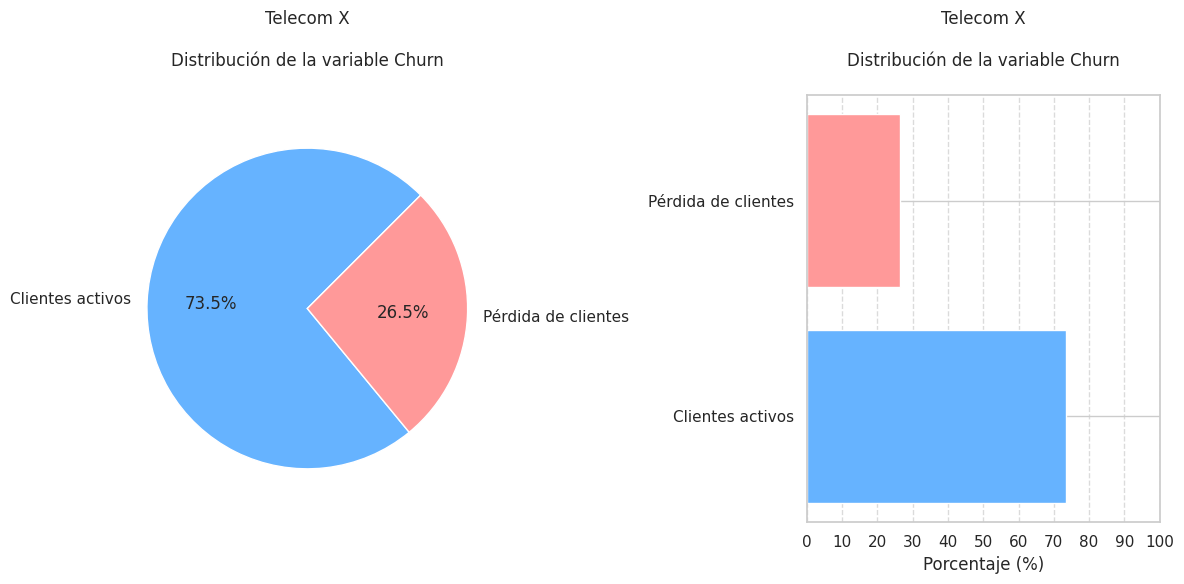

In [685]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Clientes activos', 'Pérdida de clientes']
proporciones = datos_normalizados['churn'].value_counts(normalize=True) * 100

# Figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de torta
axes[0].pie(proporciones, labels=labels, autopct='%1.1f%%',
            startangle=45, colors=['#66b3ff', '#ff9999'])
axes[0].axis('equal')
axes[0].set_title('Telecom X\n\nDistribución de la variable Churn\n')

# Gráfico de barras horizontales
axes[1].barh(labels, proporciones, color=['#66b3ff', '#ff9999'])
axes[1].set_xlim(0, 100)
axes[1].set_xlabel('Porcentaje (%)')
axes[1].set_title('Telecom X\n\nDistribución de la variable Churn\n')
axes[1].grid(axis='x', linestyle='--', alpha=0.7)
axes[1].set_xticks(np.arange(0, 101, 10))

plt.tight_layout()
plt.show()


In [686]:
# Estimación de las tasas mensual y anual de churn.

# Total de clientes en baja
clientes_baja = datos_normalizados['churn'].sum()

# Total de meses de permanencia de todos los clientes
suma_meses = datos_normalizados['tenure'].sum()
# Estimación de la tasa de churn mensual
tasa_mensual_churn = clientes_baja / suma_meses

# Estimación de la tasa anual a partir de la mensual
tasa_anual_churn = 1 - (1 - tasa_mensual_churn)**12

# Mostrar resultados como porcentaje
print(f"Total de clientes en baja: {clientes_baja}")
print(f"Total de meses de permanencia de todos los clientes: {suma_meses}")
print(f"Tasa de churn mensual: {tasa_mensual_churn:.2%}")
print(f"Tasa de churn anual: {tasa_anual_churn:.2%}")

Total de clientes en baja: 1869
Total de meses de permanencia de todos los clientes: 227990
Tasa de churn mensual: 0.82%
Tasa de churn anual: 9.41%


##### Observaciones

Pie: Para mostrar cómo se distribuye un elemento total entre diferentes categorías.

Barh: Para comparar valores entre grupos o mostrar tendencias.


Ambos gráficos muestran los porcentajes de permanencia y de pérdida de clientes.

Están relacionadas de 75% a 25% apróximadamente, los que indica que de cada 4 clientes, 1 se ha ido.

Según Zoura y Statista las tasas mensual y anual para empresas de telecomunicaciones son del 2% y 20% respectivamente.
Valores superiores a los indicados, son alcanzables en mercados menos maduros .

Con los datos manejados las estimaciones de estas tasas son:
  * Tasa mensual de churn = 0.82%
  * Tasa anual de churn = 9.41%

Estos resultados son indicadores favorables de fidelización.

Enlaces de consulta:
https://www.zuora.com/glossary/subscriber-churn/?utm_source=chatgpt.com
https://www.statista.com (Buscar "telecom churn rate")

### Recuento de evasión por variables categóricas

#### Variables relacionadas con la información personal
  * churn vs. gender, senior_citizen, partner y dependents

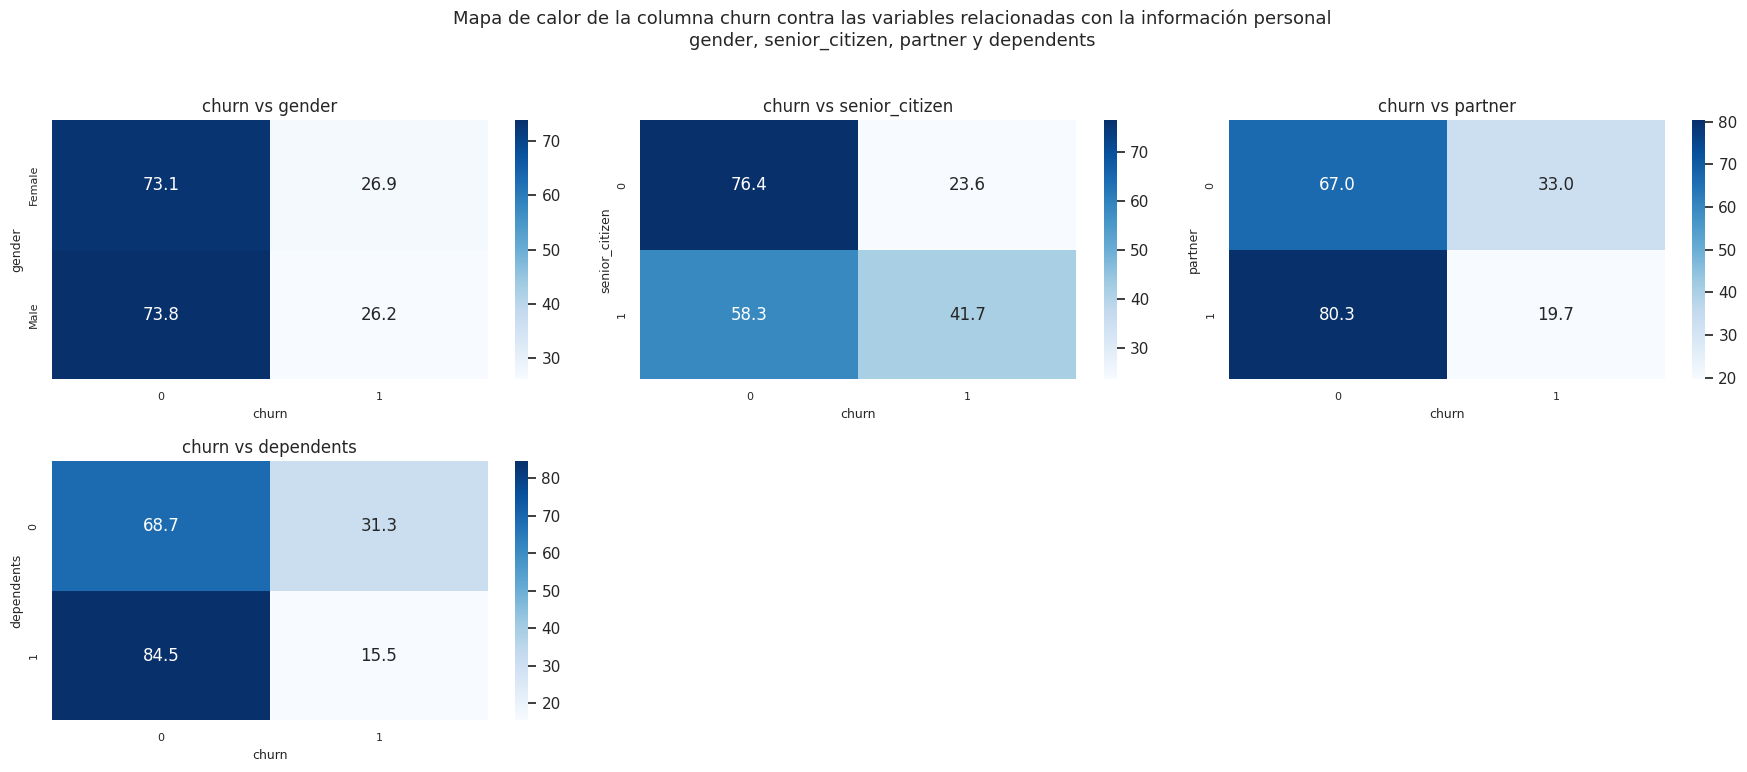

In [687]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Columnas categóricas
columnas_categoricas = [
    'gender', 'senior_citizen', 'partner', 'dependents']

# Figura
n_cols = 3
n_rows = (len(columnas_categoricas) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3.5))
axes = axes.flatten()

# Heatmaps
for idx, col in enumerate(columnas_categoricas):
    tabla = pd.crosstab(datos_normalizados[col], datos_normalizados['churn'], normalize='index') * 100
    sns.heatmap(tabla, annot=True, fmt=".1f", cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'churn vs {col}')
    axes[idx].set_xlabel('churn', fontsize = 9)
    axes[idx].set_ylabel(col, fontsize = 9)
    axes[idx].tick_params(axis='both', labelsize=8)

# Ocultar ejes vacíos si hay
for i in range(len(columnas_categoricas), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Mapa de calor de la columna churn contra las variables relacionadas con la información personal\ngender, senior_citizen, partner y dependents', fontsize=13, y=1.10)
plt.show()

##### Observaciones

Crosstab: Tabla de frecuencia que muestra la distribución conjunta de dos variables categóricas.

Heatmap: Representación gráfica de una tabla donde los valores se muestran con colores según su magnitud.

* churn vs gender

  Poseen una distribución muy similar:
  * Mujeres: 73.1% sin churn, 26.9% con churn.
  * Hombres: 73.8% sin churn, 26.2% con churn.

  No hay una diferencia relevante entre géneros que hagan variar el churn.
  Por tanto, gender no es una variable con la que se pueda estimar o predecir el comportamiento de la variable churn.

* churn vs senior_citizen
  * Menores de 65 años: 76.4% sin churn 23.6% con churn
  * Mayores de 65 años: 58.3% sin churn 41.7% con churn

  Los adultos mayores tienen una tasa de abandono significativamente más alta, lo cual sugiere que senior_citizen, sí está relacionado con churn.

* churn vs partner

  * Sin pareja: 67.0% sin churn 33.0% con churn
  * Con pareja: 80.3% sin churn 19.7% con churn

  Tener pareja ofrece una menor probabilidad de churn, posiblemente por mayor estabilidad o uso y pago compartido de servicios.

* churn vs dependents

  * Sin dependientes: 68.7% sin churn 31.3% con churn
  * Con dependientes: 84.5% sin churn 15.5% con churn

  Tener dependientes reduce significativamente la tasa de abandono. Posiblemente porque las personas con dependientes valoran más la continuidad del servicio.

En resumen, las variables senior_citizen, partner	y dependents incluyen sobre el comportamiento de la variable churn, mientras que genre, no influye de forma apreciable.

#### Variables relativas a los servicios adquiridos
  * phone_service, multiple_lines, internet_service, online_security,  online_backup, device_protection, tech_support, streaming_tv y streaming_movies

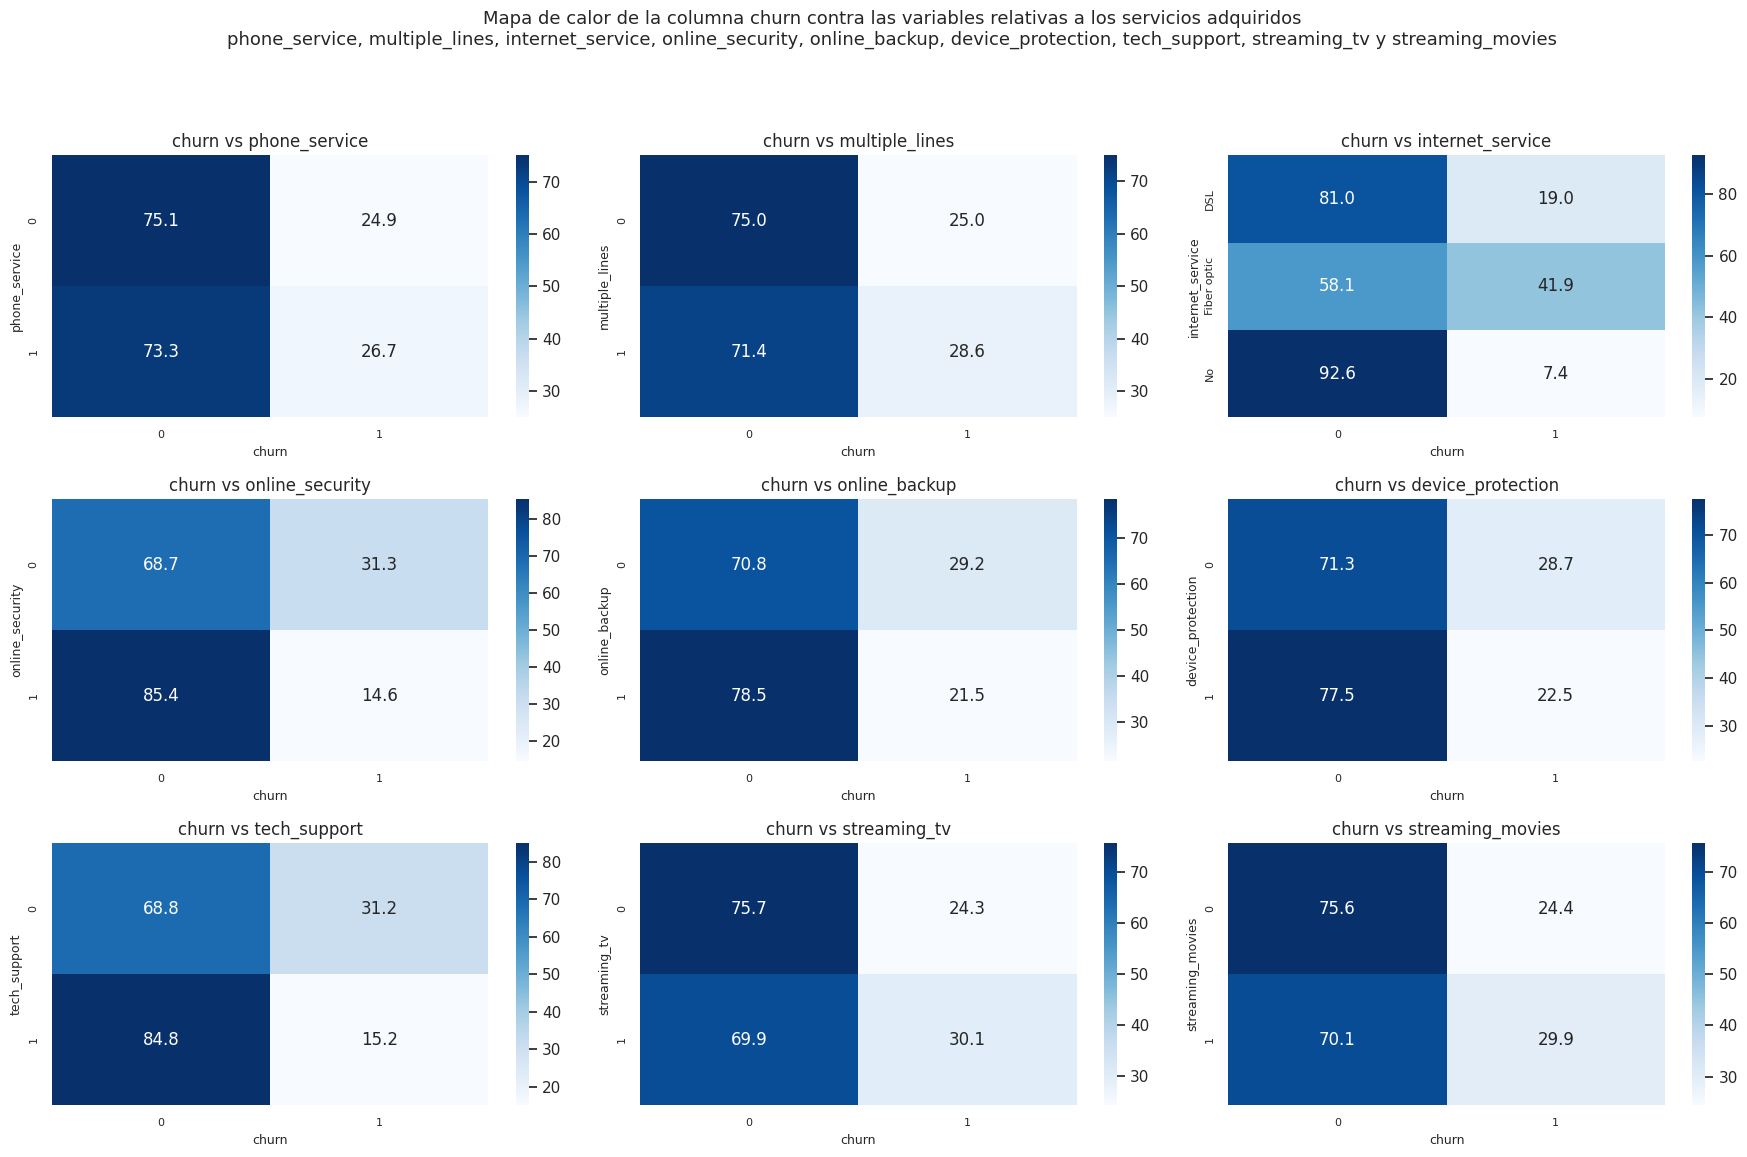

In [688]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Columnas categóricas
columnas_categoricas = ['phone_service','multiple_lines', 'internet_service', 'online_security', 'online_backup',
    'device_protection','tech_support', 'streaming_tv', 'streaming_movies']

# Figura
n_cols = 3
n_rows = (len(columnas_categoricas) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3.5))
axes = axes.flatten()

# Heatmaps
for idx, col in enumerate(columnas_categoricas):
    tabla = pd.crosstab(datos_normalizados[col], datos_normalizados['churn'], normalize='index') * 100
    sns.heatmap(tabla, annot=True, fmt=".1f", cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'churn vs {col}')
    axes[idx].set_xlabel('churn', fontsize = 9)
    axes[idx].set_ylabel(col, fontsize = 9)
    axes[idx].tick_params(axis='both', labelsize=8)

# Ocultar ejes vacíos si hay
for i in range(len(columnas_categoricas), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Mapa de calor de la columna churn contra las variables relativas a los servicios adquiridos\nphone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_tv y streaming_movies', fontsize=13, y=1.10)
plt.show()

##### Observaciones

Crosstab: Tabla de frecuencia que muestra la distribución conjunta de dos variables categóricas.

Heatmap: Representación gráfica de una tabla donde los valores se muestran con colores según su magnitud.

* churn vs. phone_service

  * Sin servicio: 75.1% sin churn, 24.9% con churn
  * Con servicio: 73.3% sin churn, 26.7% con churn

  * La similitud entre las tasas de abandono de los clientes con o sin el servicio (26.7% y 24.9%) indica que phone_service no es una variable que afecte al churn de alguna forma.

* churn vs. multiple_lines

  * Sin servicio: 75.0% sin churn, 25.0% con churn
  * Con servicio: 71.4% sin churn, 28.6% con churn

 * Al igual que phone_service, con una diferencia ligeramente por encima del doble (3.6%) las tasas de abandono entre los clientes que poseen o no el servicio es similar y no parece ser un factor fuerte que influya sobre la variable churn.

* churn vs. internet_service

  * Fiber optic: 58.1% sin churn, 41.9% con churn
  * DSL: 81.0% sin churn, 19.0% con churn
  * No internet: 92.6% sin churn, 7.4% con churn

  Los clientes con fiber optic poseen una tasa de abandono alta del 41.9% mayor que la suma de las tasas de abandono de los clientes con DSL o sin el servicio juntas (26.4%) con una diferencia de 15.5%.
  Los clientes sin el servicio poseen una baja tasa de abandono del 7.4%.

* churn vs. online_security

  * Sin servicio: 68.7% sin churn, 31.3% con churn
  * Con servicio: 85.4% sin churn, 14.6% con churn

  Contratar los servicios de seguridad en línea reduce la tasa de abandono.
  Aumenta la fidelidad al requerir servicios del proveedor.

* churn vs. online_backup

  * Sin servicio: 70.8% sin churn, 29.2% con churn
  * Con servicio: 78.5% sin churn, 21.5% con churn

  Similar a online_security. Contratar el servicio de backup reduce la tasa de abandono. Indica mayor uso y fidelización.

* churn vs. device_protection

  * Sin servicio: 71.3% sin churn, 28.7% con churn
  * Con servicio: 77.5% sin churn, 22.5% con churn

  Tener protección de dispositivo también reduce la tasa de abandono.

* churn vs. tech_support

  * Sin servicio: 68.8% sin churn, 31.2% con churn
  * Con servicio: 84.8% sin churn, 15.2% con churn

  tech_support es la variable de servicios más relevantes para reducir la tasa de abandono. Ella junto con el servicio Fiber optic de la variable internet_service, son los factores que favorecen la permanencia de los clientes.

* churn vs. streaming_tv

  * Sin servicio: 75.7% sin churn, 24.3% con churn
  * Con servicio: 69.9% sin churn, 30.1% con churn

  Los clientes con servicio de TV abandonan con más facilidad. Posiblemente el costo no compensa el servicio recibido y no es percibido como diferenciador por parte de los clientes.

* churn vs. streaming_movies

  * Sin servicio: 75.6% sin churn, 24.4% con churn
  * Con servicio: 70.1% sin churn, 29.9% con churn

  Igual que en streaming_tv, los clientes que utilizan el servicio, poseen la mayor tasa de abandono.

En resumen, los servicios son buenas herramientas para aumentar la permanencia de los clientes, pero, se debe determinar que necesitan los servicios de phone_service, multiple_lines, internet_service (fiber optic), streaming_tv y straming_movies para mejorar el servicio propuesto y disminuir la incidencia negativa sobre la variable churn.

#### Variables relativas a la contratación
  * churn vs. contract, paperless_billing y payment_method

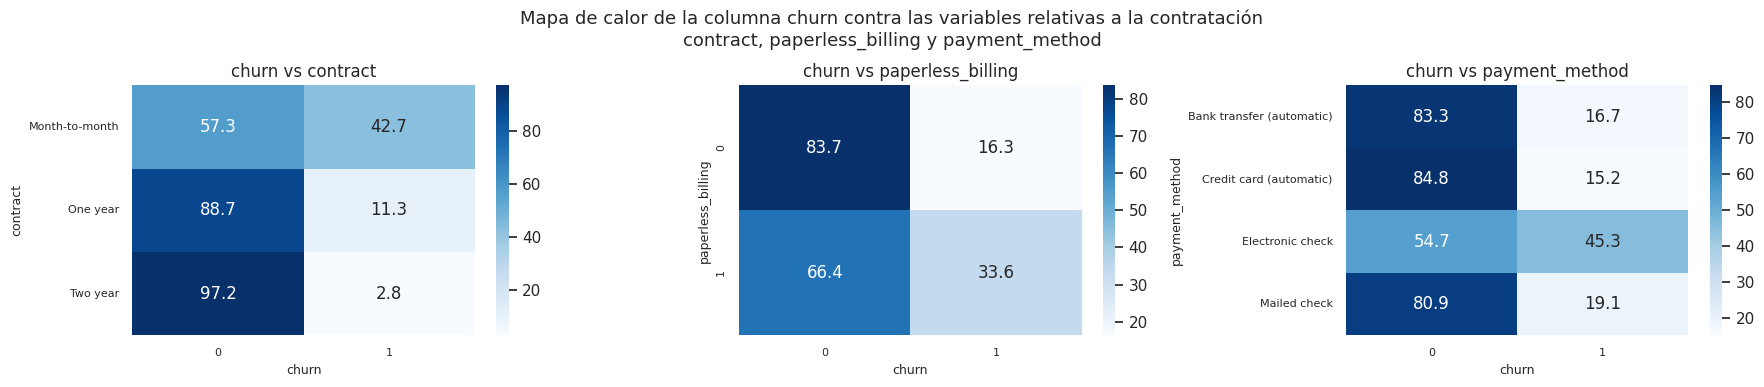

In [689]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Columnas categóricas
columnas_categoricas = ['contract', 'paperless_billing', 'payment_method']

# Figura
n_cols = 3
n_rows = (len(columnas_categoricas) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3.5))
axes = axes.flatten()

# Heatmaps
for idx, col in enumerate(columnas_categoricas):
    tabla = pd.crosstab(datos_normalizados[col], datos_normalizados['churn'], normalize='index') * 100
    sns.heatmap(tabla, annot=True, fmt=".1f", cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'churn vs {col}')
    axes[idx].set_xlabel('churn', fontsize = 9)
    axes[idx].set_ylabel(col, fontsize = 9)
    axes[idx].tick_params(axis='both', labelsize=8)


# Ocultar ejes vacíos si hay
for i in range(len(columnas_categoricas), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Mapa de calor de la columna churn contra las variables relativas a la contratación\ncontract, paperless_billing y payment_method', fontsize=13, y=1.10)
plt.show()

##### Observaciones

Crosstab: Tabla de frecuencia que muestra la distribución conjunta de dos variables categóricas.

Heatmap: Representación gráfica de una tabla donde los valores se muestran con colores según su magnitud.

* churn vs. contract
	* Month-to-month: 57.3% sin churn, 42.7% con churn
	* One year: 88.7% sin churn, 11.3% con churn
	* Two years: 97.2% sin churn, 2.8% con churn

	Los clientes con contratos mensuales son más propensos a abandonar con un 42.7%, los contratos a largo plazo mantienen un porcentaje de abandono aceptable.
	Este parece ser el predictor principal de la variable churn.

* churn vs. paperless_billing

	* Sin servicio: 83.7% sin churn, 16.3% con churn
	* Con servicio: 66.4% sin churn, 33.6% con churn

	Los clientes con facturación electrónica poseen mayor tasa de abandono con un 33.6%.
	Esto puede indicar que el cliente digital, es más exigente o propenso a comparar opciones online.

* churn vs. payment_method
	* Bank transfer (Automatic): 83.3% sin churn, 16.7% con churn
	* Credit card (Automatic): 84.8% sin churn, 15.2% con churn
	* Electronic check: 54.7% sin churn, 45.3% con churn
	* Mailed check: 80.9% sin churn, 19.1% con churn

	Los pagos automáticos están favorablemente ligados a una baja tasa de abandono, pero quienes utilizan el método electronic check, poseen mayor tasa de abandono con un 45.3%.

En resumen el tipo de contrato se convierte en el principal predictor de la variable churn en relación a las variables categóricas, por lo que se debe fomentar la contratación a largo plazo y/o revisar y solucionar los inconvenientes que presenta la contratación mensual.
También deben revisarse las condiciones de los servicios de paperless_billing y payment_method (Electronic check) pues ambos servicios aumentan el abandono por parte de los clientes.

### Distribución de la evasión por variables numéricas
  * churn vs. tenure, monthly_charges, daily_charges, total_charges y difference


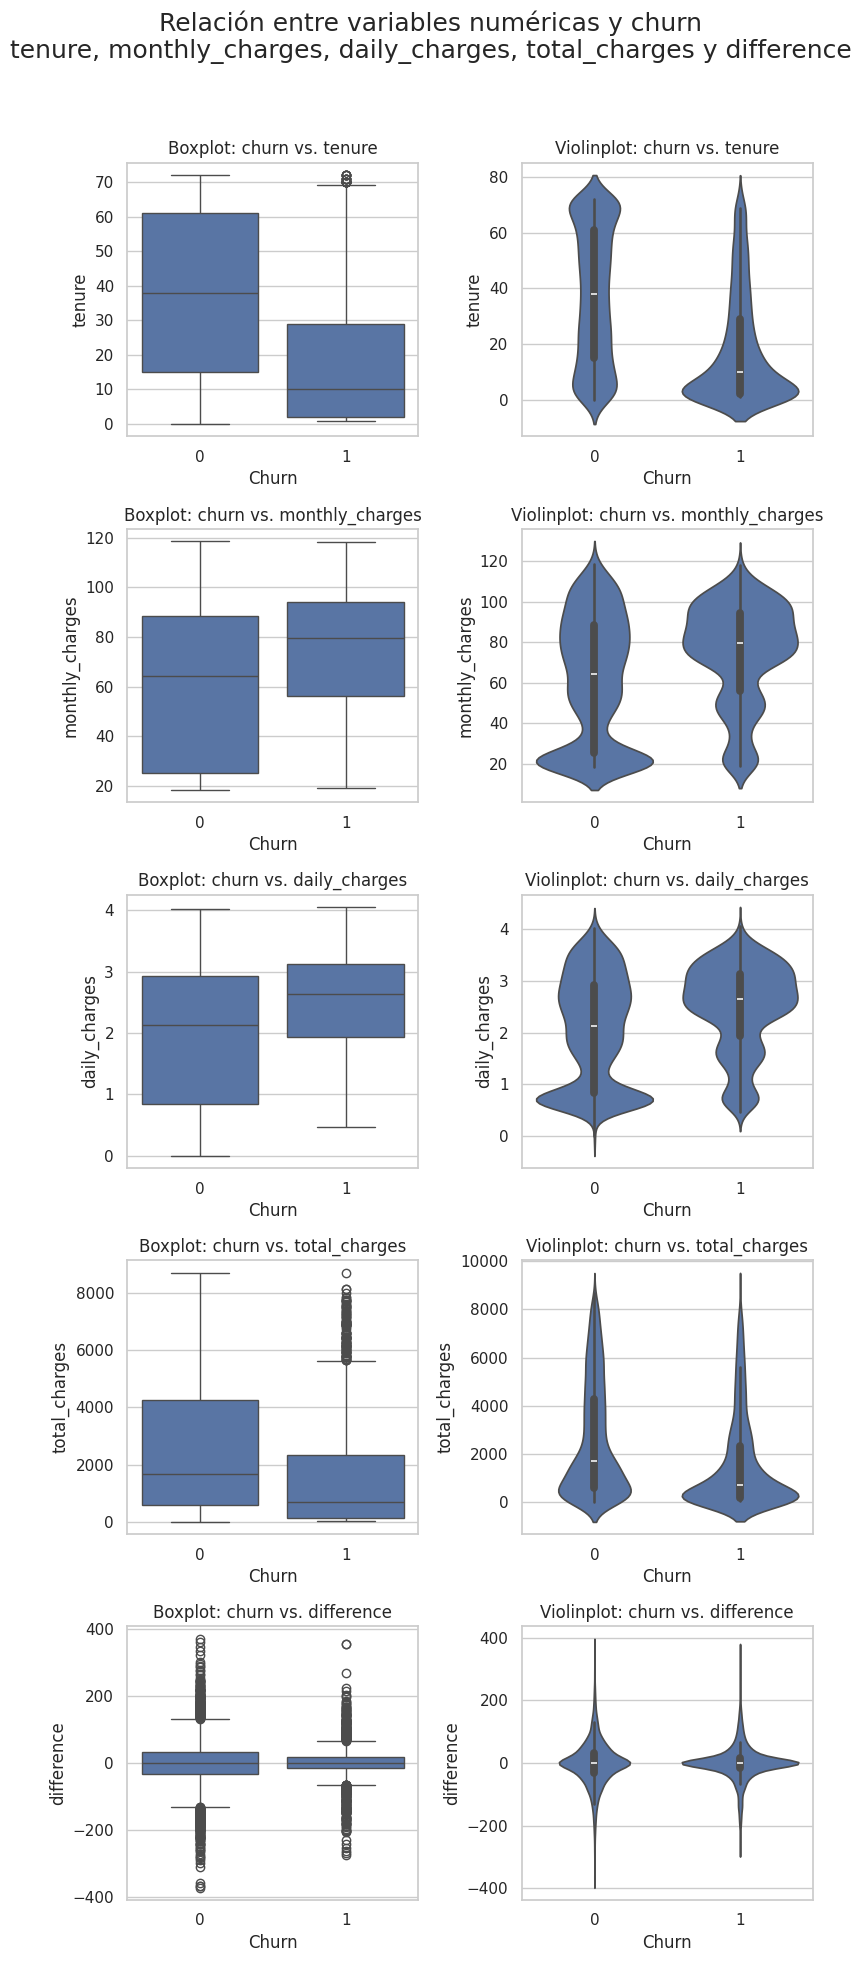

In [690]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Variables numéricas
variables_numericas = ['tenure', 'monthly_charges', 'daily_charges', 'total_charges',  'difference']

# Figura con subplots
# Una fila por variable y dos columnas para los gráficos (boxplot y violinplot)
fig, axes = plt.subplots(len(variables_numericas), 2, figsize=(8, 4 * len(variables_numericas)))
fig.suptitle("Relación entre variables numéricas y churn\ntenure, monthly_charges, daily_charges, total_charges y difference", fontsize=18)

# Creación de gráficos por cada cariable numérica
for i, var in enumerate(variables_numericas):
    # Boxplot
    sns.boxplot(data=datos_normalizados, x='churn', y=var, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot: churn vs. {var}')
    axes[i, 0].set_xlabel('Churn')
    axes[i, 0].set_ylabel(var)

    # Violinplot
    sns.violinplot(data=datos_normalizados, x='churn', y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Violinplot: churn vs. {var}')
    axes[i, 1].set_xlabel('Churn')
    axes[i, 1].set_ylabel(var)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


##### Observaciones

Boxplots: Resumen estadístico (mediana, cuartiles, outliers) de cada variable.

Violinplots: Añaden la densidad de probabilidad, mostrando la distribución de los datos dentro de cada grupo.

* churn vs. tenure

    * Los clientes que se quedaron tienen una mediana de permanencia mucho mayor.
    * Los que se fueron tienden a haberse quedado por muy poco tiempo.
    * Distribución más densa cerca de 0 para los clientes que abandonaron, la duración del servicio es un fuerte predictor del churn.
    * Tenure tiene un relación fuerte e inversa con churn.
    
* chrun vs. monthly_charges

    * Los clientes con mayores cargos mensuales parecen tener una ligeramente mayor probabilidad de abandonar.
    * Aunque hay traslape, la mediana de los clientes que abandonan está un poco más alta.
    * Distribuciones más anchas para los clientes que abandonan, sugiere más variabilidad.
    * Monthly charges tiene relación moderada con churn.

* chrun vs. daily_charges

    * Similar al anterior, aunque los valores son más estrechos.
    * Distribuciones muy parecidas, aunque ligeramente más altas para los clientes que abandonan.
    * Sugiere que una carga diaria más alta podría asociarse con abandono, pero el efecto es leve.

* chrun vs. total charges
    * Clientes que permanecieron tienen un total acumulado mucho mayor.
    * los clientes que abandonan, el total tiende a ser más bajo, lo que refuerza que muchos se van temprano.
    * Total charges está fuertemente correlacionado con tenure y también muestra un patrón claro con churn.

* chrun vs. difference

    * El comportamiento entre lo estimado y lo real se comporta de la siguiente manera:
      * Casi simétricamente distribuida en ambos grupos.
      * Ligeramente más dispersa para los clientes que abandonan, aunque no hay un patrón claro.
      * En ambos casos, la mediana es muy cercana a cero lo que indica que es una buena estimación en promedio.
      * La diferencia no parece estar relacionada directamente con churn. Es más útil para verificar la consistencia de los datos que como predictor.

En resumen: Las variables que más afectan el abandono de los clientes son tenure y total_charges. Monthly_charges lo afecta de forma moderada y, daily_charges y difference no aportan ningún criterio que afecte la permanencia o el abandono de los clientes.

### Correlación de variables

In [691]:
# Como se trata de un análisis exploratorio, se tomarán todas las columnas existentes en el data frame datos_normalizados
# Para cada columna se mantendrán las categorías existentes --> drop_first=False

# Las colunas categóricas que serán convertiidas a variables dummy son:
columnas_categoricas = [
    'gender',
    'internet_service',
    'contract',
    'payment_method'
]

df_dummies = pd.get_dummies(datos_normalizados, columns=columnas_categoricas, drop_first=False)

# Se elimina la columna customer_id
df_dummies = df_dummies.drop(columns=['customer_id'])

df_dummies.head()

,churn,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,internet_service_DSL,internet_service_Fiber optic,internet_service_No,contract_Month-to-month,contract_One year,contract_Two year,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,True,False,False,False,True,False,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,True,False,False,True,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,0,1,...,False,True,False,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,False,True,False,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [692]:
# Calcular la matriz de correlación

import pandas as pd

correlacion = df_dummies.corr(numeric_only=False)

# Filtrar las correlaciones con respecto a churn, ordenarlas y almacenarlas en un data frame
df_correlacion_churn = pd.DataFrame(correlacion['churn'].drop('churn').sort_values(ascending=True))

# Separar correlaciones positivas (>= 0) y negativas ( < 0)
df_corr_pos = df_correlacion_churn[df_correlacion_churn >= 0]
df_corr_neg = df_correlacion_churn[df_correlacion_churn < 0]

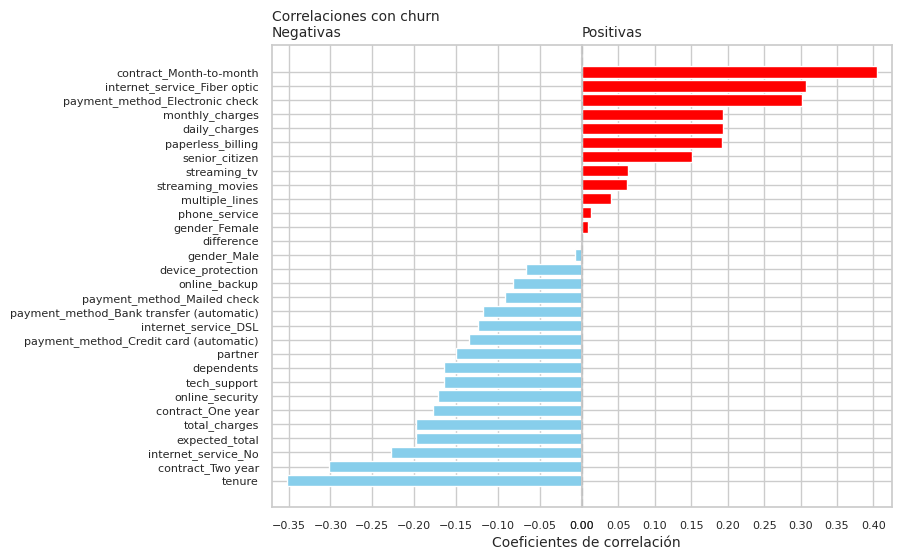

In [693]:
import matplotlib.pyplot as plt

# Crear figura con dos gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6), sharey=True)



# Gráfico de barras horizontales para correlaciones negativas
axes[0].barh(df_corr_neg.index, df_corr_neg['churn'], color="skyblue")
axes[0].set_title("Correlaciones con churn\nNegativas", fontsize=10, loc="left")
axes[0].set_xlabel("Coeficientes ", fontsize=10, loc="right")
axes[0].axvline(0, color="gray", linestyle="--")  # Línea de referencia
axes[0].set_yticks(range(len(df_corr_pos)))
axes[0].set_yticklabels(df_corr_pos.index, fontsize=8)



# Gráfico de barras horizontales para correlaciones positivas
axes[1].barh(df_corr_pos.index, df_corr_pos['churn'], color="red")
axes[1].set_title("Positivas", fontsize=10, loc="left")
axes[1].set_xlabel("de correlación", fontsize=10, loc="left")
axes[1].axvline(0, color="gray", linestyle="--")
axes[1].set_yticks(range(len(df_corr_neg)))
axes[1].set_yticklabels(df_corr_neg.index, fontsize=8)

axes[0].tick_params(axis="x", labelsize=8)
axes[1].tick_params(axis="x", labelsize=8)
# Espacio entre gráficos
plt.subplots_adjust(wspace=0)

plt.show()


#### Observaciones

* La correlación positiva indica que la probabilidad de abandono aumenta, en la medida que aumenta la variable. En el gráfico se aprecia que las variables:

  * contract_Month-to-month
  * internet_service_Fiber optic
  * payment_method_Electronic check
  * monthly_charges
  * daily_charges
  * paperless_billing
  * senior_citizen
  * streaming_tv
  * streaming_movies
  * multiple_lines

  presentan un coeficiente de correlación positivo y aquellas con el valor más alto, son las que afectan significativamente el abandono por parte de los clietes.


* La correlación negativa indica la probabilidad de permanencia aumenta, cuando la variable también lo hace. Las variables:

  * tenure
  * contract_Two year
  * internet_service_No
  * expected_total
  * total_charges
  * contract_One year
  * online_security
  * tech_support
  * dependents
  * partner
  * payment_method_Credit card (automatic)
  * internet_service_DSL
  * payment_method_Bank transfer (automatic)
  * payment_method_Mailed check
  * online_backup
  * device_protection

  favorecen la retención de clientes.

* Valores de correlación cercanos a cero, sugieren que no hay una relación lineal fuerte. Las variables:

  * gender_Male
  * difference
  * gender_Female
  * phone_service

  no inciden en el abandono por parte de los clientes.

* Este análisis coincide con lo encontrado en los análisis previos.

# Informe final

## Introducción

Telecom X es una empresa de telecomunicaciones y ha solicitado los servicios de un analista de datos, para trabajar en un proyecto específico de Churn de clientes (Pérdida o rotación de clientes.)

La empresa está enfrentando un alto índice de evasión de clientes y aún no han identificado el problema de esta evasión.

La empresa ha proporcionado un conjunto de datos con la información necesaria para buscar, tratar y realizar un análisis exploratorio de estos, posteriormentelos los datos deben ser limpiados y normalizados, para que el equipo de ciencia de datos, realice un análisis predictivo y determinar de dónde proviene esta evasión de clientes.

Los datos se encuentran en formato JSON y pueden ser obtenidos a través del enlace: https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json

La empresa también ha  proporcionado un tablero de Trello para el seguimiento de las actividades.

En la sección de extracción de datos del tablero, se proporciona una API que entregará un JSON desde donde se podran extraer datos en tu Google Colab.

Una vez que completado todos los pasos indicados en el tablero Trello, debe entregar un informe final con las conclusiones del análisis y exponer las posibles razones por las cuales está ocurriendo esta evasión de clientes.

Como objetivo académico, este desafío pretende desarrollar habilidades en ETL (Extract, Transform, Load) con Python, captura de datos a través de una API
y la puesta en práctica de todas las habilidades adquirida para análisis exploratorio y hacer uso de herramientas como Python, Pandas y Matplotlib.

Después de esta etapa de procesamiento, los datos deben estar organizados de manera que permitan un análisis más profundos y visualizaciones.

## Limpieza y tratamiento de datos

  * Se describen los pasos realizados para importar, limpiar y procesar los datos.

### Importación




La extracción de los datos se realiza desde la API proporcionada con la instrucción:
  pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json')
  
  y asignada a un data frame.

#### Diccionario de datos


Para la comprensión del archivo JSON, fue proporcionado el siguiente diccionario de datos.

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

### Limpieza y procesamiento

#### Establecer un data frame con todas las columnas indicadas en el diccionario de datos


#####      

* La visualización del data frame reveló la presencia de columnas con diccionarios como valores, que deben ser expandidos para poder tratar la datos anidados.

  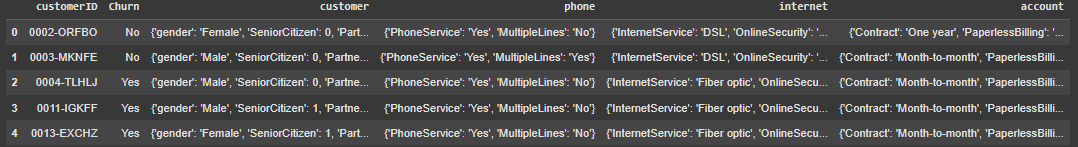

* Las columnas iniciales 'customerID' y 'Churn' poseen datos sin anidar y se extraen del resto consultándolas con:
  * datos_C0C1 = datos[['customerID','Churn']]  

* Las columnas anidadas van de la posicón 2 a la 5 ('customer', 'phone', 'internet', 'account')
* Estos datos se extraen por separado consultando cada columna y asignándola a un data frame de nombre omónimo y se normalizan en la misma instrucción con la función pd.json_normalize(datos_columna=pd.json_normalize(datos['columna']) )

  * datos_customer=pd.json_normalize(datos['customer'])
  * datos_phone=pd.json_normalize(datos['phone'])
  * datos_internet=pd.json_normalize(datos['internet'])
  * datos_account=pd.json_normalize(datos['account'])

* Los data frames datos_C0C1, datos_customer, datos_phone, datos_internet, datos_account se unen en un data frame de nombre datos_normalizados con la función pd.concat

* datos_normalizados = pd.concat([datos_C0C1, datos_customer, datos_phone,    datos_internet, datos_account], axis=1)

* El resultado de estas acciones es, un data frame con columnas no anidadas.

   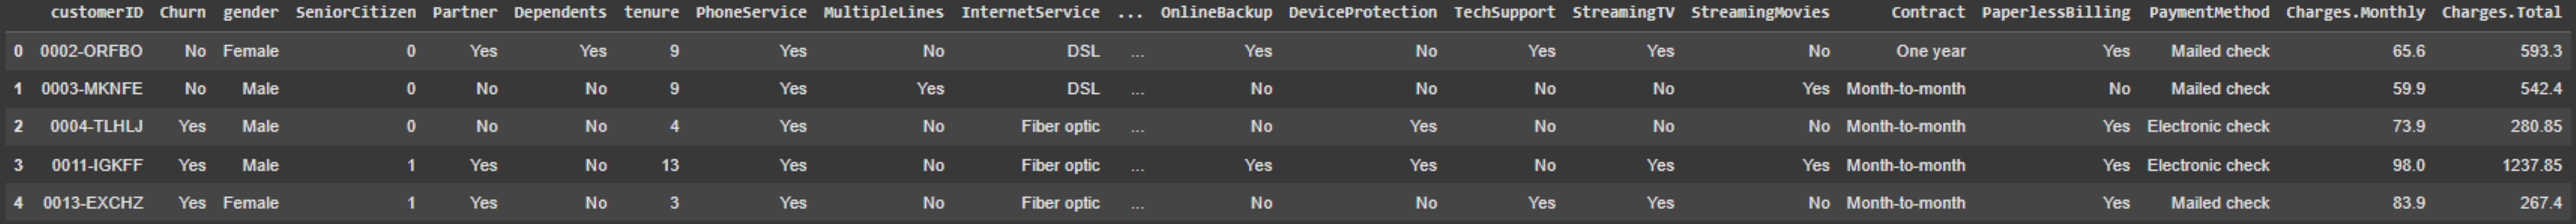

* Se ajustan los índices y se consulta la información del data frame resultante para verificar los tipos de datos.

  datos_normalizados.reset_index(drop=True, inplace=True)

  datos_normalizados.info()


    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 7267 entries, 0 to 7266
    Data columns (total 21 columns):
    #   Column            Non-Null Count  Dtype  
    ---  ------            --------------  -----  
    0   customerID        7267 non-null   object
    1   Churn             7267 non-null   object
    2   gender            7267 non-null   object
    3   SeniorCitizen     7267 non-null   int64  
    4   Partner           7267 non-null   object
    5   Dependents        7267 non-null   object
    6   tenure            7267 non-null   int64  
    7   PhoneService      7267 non-null   object
    8   MultipleLines     7267 non-null   object
    9   InternetService   7267 non-null   object
    10  OnlineSecurity    7267 non-null   object
    11  OnlineBackup      7267 non-null   object
    12  DeviceProtection  7267 non-null   object
    13  TechSupport       7267 non-null   object
    14  StreamingTV       7267 non-null   object
    15  StreamingMovies   7267 non-null   object
    16  Contract          7267 non-null   object
    17  PaperlessBilling  7267 non-null   object
    18  PaymentMethod     7267 non-null   object
    19  Charges.Monthly   7267 non-null   float64
    20  Charges.Total     7267 non-null   object
    dtypes: float64(1), int64(2), object(18)
    memory usage: 1.2+ MB

* Se verifica la presencia de valores nulos
  
  Verificación de valores nulos
  datos_normalizados.isnull().sum()

  El resultado indicó que las columnas no tienen valores nulos.

  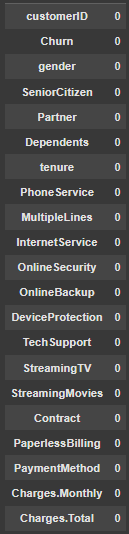


* Verificación de valores únicos y repetidos en las columnas

  Se utilizó la función .unique() sobre el data frame para cada columna para obtener la información los valores únicos y sí existen valores repetidos.
  
  Se obtuvieron los siguientes resultados.

  * customerID: Todos los valores son únicos, lo que corresponde con la definición de la columna.

  * churn: 3 cadenas de caracteres que se repiten entre las filas: 'No', 'Yes' y ''.
    * El valor '' se encuentra en 224 filas.
    * Dejar los datos así, complicaría el análisis en cualquier modelo posterior.
    * Como no se tiene más información que permita y justifique asignar uno de los dos valores restantes, validos por definición, o asignar otro valor que los categorice, es conveniente eliminar las 224 filas con valores faltantes pues representan el 3.08%, lo cual es aceptable.
    * Se convertira la columna Churn a numérica y los valores 'No' y 'Yes' a 0 y 1 respectivamente para su inclusión en nuevos modelos.

  * gender: Se repiten las cadenas de caracteres 'Female' y 'Male'

  * SeniorCitizen: Se repiten los valores numéricos 0 y 1

  * Partner, Dependents Phone_service PaperlessBilling: Se repiten las cadenas de caracteres 'Yes' y 'No'

  * tenure: Posee 73 valores numéricos únicos y el resto son valores numéricos duplicados.
    * Es aceptable que pueden repetirse la cantidad de meses de permanencia.
    * Los valores iguales a cero indican que los contratos no han llegado al primer mes de permanencia.

  * MultipleLines: Se repiten las cadenas de caracteres 'Yes', 'No' y 'No phone service'.
    * Se verificó el valor de la columna PhoneService para cada una de las líneas del data frame que poseen el valor 'No phone service' en la columna MultipleLines.
    * El resultado mostró que todas ellas poseen el valor 'No' en esa columna, por lo que podemos inferir que el valor 'No phone service' puede ser sustituido por el valor 'No'.

  * InternetService: Se repiten las cadenas de caracteres 'DSL', 'Fiber optic' y 'No'

  * OnlineSecurity, OnlineBackup, DeviceProtection TechSupport Streaming_TV y  StreamingMovies: Se repiten las cadenas de caracteres 'No', 'Yes' y 'No internet service'
    * Se verificó el valor de la columna InternetService para cada una de las líneas del data frame que poseen el valor 'No internet service' en las columnas anteriores.
    * El resultado mostró que todas ellas poseen el valor 'No' en esa columna, por lo que podemos inferir que el valor 'No internet service' puede ser sustituido por el valor 'No'.

  * Contract: Se repiten las cadenas de caracteres 'One year', 'Month-to-month' y 'Two year'.

  * PaymentMethod: Se repiten las cadenas de caracteres 'Mailed check','Electronic check', 'Credit card (automatic)' y 'Bank transfer (automatic)'

  * Charges.Monthly: Existen 1585 valores numéricos únicos. El resto son valores repetidos, pero este campo por definición puede tenerlos.

  * Charges.Total: Existen 6531 cadenas de caracteres únicos. El resto son valores repetidos, pero este campo por definición puede tenerlos.
    * La columna Chrages.Total debe tratarse como una columna con datos númericos dada su definición.


* Revisión de patrones en la columna customerID

  * Esta columna parace estar formada por dos informaciones separadas por '-'.
  * La primera es una cadena de caracteres de 4 dígitos y la segunda por una cadena de 5 caracteres alfabéticos en mayúsculas que obedece al formato 'nnnn-AAAAA' donde n es un dígito de 0 a 9 y A, una letra del alfabeto en mayúsculas.
  
  * Se aplicó el método.str.split('-') para almacenar las porciones del código en dos data frames.

  * Al palicar .unique() sobre ambos data frames, se obtuvo que:
    * Para la primera porción existen 5194 valores únicos y 2073 repetidos.

    Valores únicos

    ['0002' '0003' '0004' ... '9992' '9993' '9995']

    Valores repetidos

    ['0013', '0017', ... '9972', '9975', '9992']

  La imagen muestra la información para los valores '0013' y '0017' de la primera porción que aparecen como duplicados.

  En ellos y en los demas registros varían los valores de la segunda porción de 5 caracteres sin coincidencia.

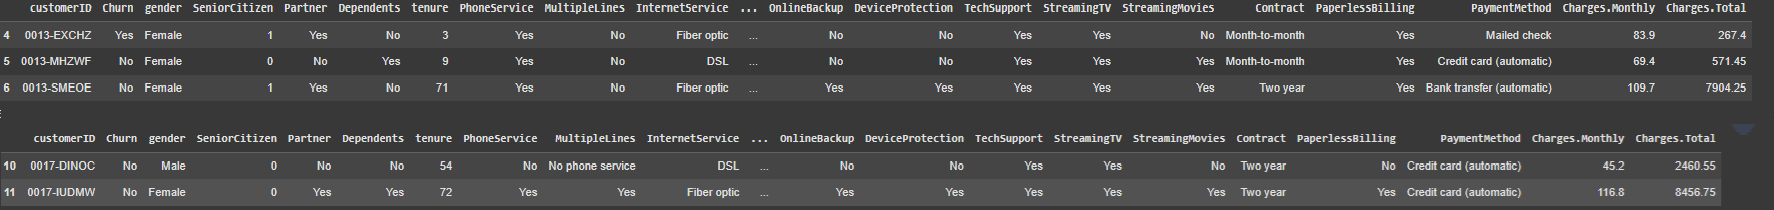

  * La información pudiera dar a entender que son miembros de un grupo relacionados de alguna forma a través de la primera porción, que adquieren los servicios por separado.

    
  * Para la segunda porción existen  7264 valores únicos y 3 que se repiten.
  Valores únicos
  ['ORFBO' 'MKNFE' 'TLHLJ' ... 'UJOEL' 'LHIEB' 'HOTOH']

  Valores repetidos
  ['CYWMH', 'GSODA', 'VUVJN']

  * La consulta para los valores repetidos no arrojó rastro de relación entre los registros.

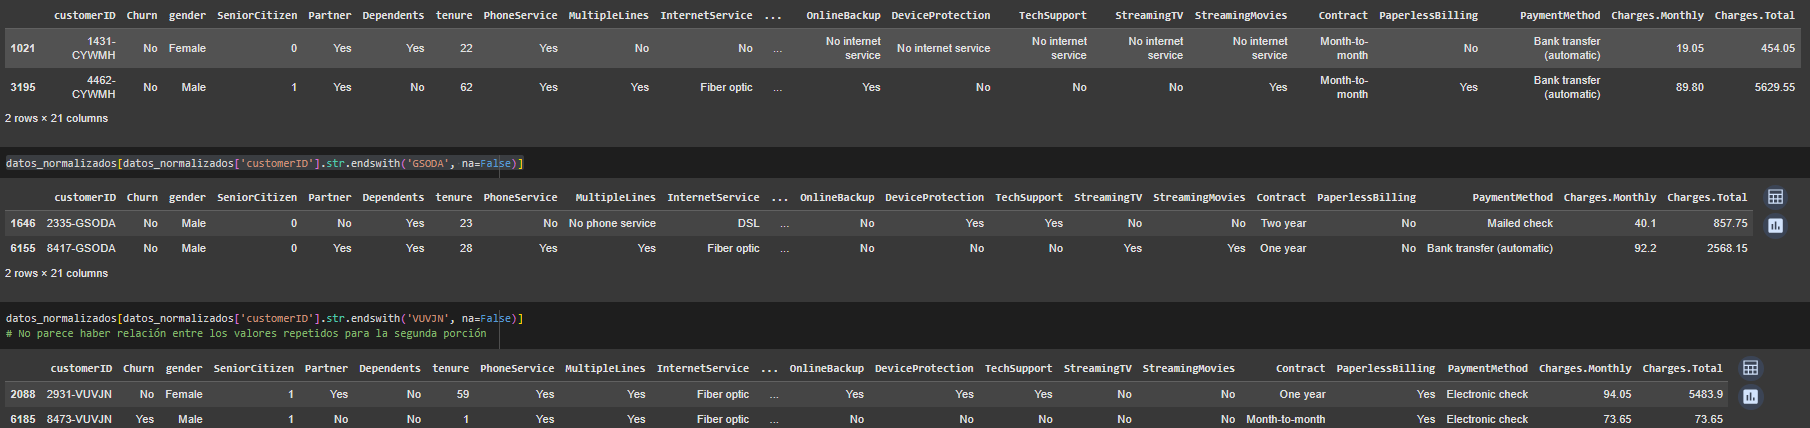    


* La estructura xxxx-yyyyy del customerID, podría sugerir la existencia de un código de sucursal o de un código de cliente padre, en el que se anidan contratos.

* No aporta valor al análisis sí no se transforman en valores separados, pero no podemos asegurar o inferir el significado de las partes sin más información.

* El campo customerID se manejara como se presenta en el data set.    


### Tratamiento

#### Renombrar columnas para una mejor legibilidad, consistencia, evitar errores y favorecer la lectura en el modelado.

  Se usará entonces, nombres más cortos y claros, letras minúsculas y guiones bajos para separar palabras, sin espacios, puntos o mayúsculas

  Se utilizó la función .rename(columns={...}, inplace=True) sobre le data frame para ejecutar la acción.

  Los nombre de las columnas quedaron de la siguiente forma:
  
  * 'customerID' ==> 'customer_id'
  * 'Churn' ==> 'churn'
  * 'SeniorCitizen' ==> 'senior_citizen'
  * Partner' ==> 'partner'
  * Dependents' ==> 'dependents'
  * 'PhoneService' ==> 'phone_service'
  * 'MultipleLines' ==> 'multiple_lines'
  * 'InternetService' ==> 'internet_service'
  * 'OnlineSecurity' ==> 'online_security'
  * 'OnlineBackup' ==> 'online_backup'
  * 'DeviceProtection' ==> 'device_protection'
  * 'TechSupport' ==> 'tech_support'
  * 'StreamingTV' ==> 'streaming_tv'
  * 'StreamingMovies' ==> 'streaming_movies'
  * "Contract" ==> "contract"
  * 'PaperlessBilling' ==> 'paperless_billing'
  * 'PaymentMethod' ==> 'payment_method'
  * 'Charges.Monthly' ==> 'monthly_charges'
  * 'Charges.Total' ==> 'total_charges'




    #<class 'pandas.core.frame.DataFrame'>
    RangeIndex: 7267 entries, 0 to 7266
    Data columns (total 21 columns):
    #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
    0   customer_id        7267 non-null   object
    1   churn              7267 non-null   object
    2   gender             7267 non-null   object
    3   senior_citizen     7267 non-null   int64  
    4   partner            7267 non-null   object
    5   dependents         7267 non-null   object
    6   tenure             7267 non-null   int64  
    7   phone_service      7267 non-null   object
    8   multiple_lines     7267 non-null   object
    9   internet_service   7267 non-null   object
    10  online_security    7267 non-null   object
    11  online_backup      7267 non-null   object
    12  device_protection  7267 non-null   object
    13  tech_support       7267 non-null   object
    14  streaming_tv       7267 non-null   object
    15  streaming_movies   7267 non-null   object
    16  contract           7267 non-null   object
    17  paperless_billing  7267 non-null   object
    18  payment_method     7267 non-null   object
    19  monthly_charges    7267 non-null   float64
    20  total_charges      7267 non-null   object
    dtypes: float64(1), int64(2), object(18)
    memory usage: 1.2+ MB


#### Eliminar filas no necesarias, transformar los datos alfanuméricos a binario y convertir las columnas object al tipo integer o flotante en los casos que aplique.

* Se eliminaron 224 filas cuyo valor en esta columna churn es igual a ''.
  * De 7267 filas quedarán 7043.
  * No existe posibilidad de asignar uno de los dos valores aceptados por definición, porque no se pudo encontrar razón para ello con los datos e información suministrada.
  * Las 224 líneas representan el 3.08% del total, lo cual es aceptable.
  * Se reajusta el índice del data frame luego de eliminar las filas.

* Transformación de valores alfanuméricos en binario.    
  * Sustitución del valor 'No phone service' con '0' para la columna:
    * multiple_lines

  * Sustitución del valor 'No internet service' con '0' para las columnas:
    * online_security
    * online_backup
    * device_protection
    * tech_support
    * streaming_tv
    * streaming_movies
    * paperless_billing

      * En los casos de las columnas con los valores 'No phone service' y 'No internet service', se pudo evidenciar que todas esas filas poseen el valor 'No' en las columnas 'phone_service' o 'internet_service' según sea el caso. Dado esto se puede asegurar que estos dos valores 'No phone service' y 'No internet service' pueden ser sustituidos por 'No' y por ende por '0' en la transformación.

      * Estas sustituciones se realizan primero en las columnas indicadas, para que no se vea afectada por la sustitución del valor 'No' en las columnas del siguiente apartado.
      Esto sucede porque, el valor a cambiar también posee la palabra 'No' y sí no se realiza primero, generaría los valores '0 phone_service' y '0 internet_service'.

  * Sustitución de los valores 'No' y 'Yes' con '0' y '1' respectivamente con para las columnas:
    * churn
    * partner
    * dependents
    * phone_service
    * online_security
    * online_backup
    * device_protection
    * tech_support
    * streaming_tv
    * streaming_movies
    * paperless_billing

  * Transformación del tipo de dato object en int64 para las columnas:
    * churn
    * partner
    * dependents
    * phone_service
    * multiple_lines
    * online_security
    * online_backup
    * device_protection
    * tech_support
    * streaming_tv
    * streaming_movies
    * paperless_billing
  
  * Se sustituyeron los caracteres '$', ',' por '' en la columna:
    * total_charges
      * En esta columna se sustituyeron posteriormente los '' remanentes por '0'.

  * Transformación del tipo de dato object en float64 para la columna:
    * total_charges

#### Crear la columna "daily_charges" con el promedio histórico de pagos diarios, representando cuánto ha pagado el cliente en promedio por día desde que inició su suscripción.

* Esta se obtiene dividiendo el la columna 'total_charges' por el producto de la columna 'tenure' en días, es decir, multiplicado por 30.
* La instrucción aplicada fue:

  datos_normalizados["daily_charges"] = round(datos_normalizados["total_charges"] / (datos_normalizados["tenure"] * 30), 2)

* La verificación de la nueva columna indicó que existen 11 filas con valores nulos en la columna 'daily_charges'.
* Estos registros coinciden con aquellos que poseen el valor 0, en la columna tenure, provocando una dicisión por 0.
* Como estas filas son validas, se sustituye el valor nulo con 0 con:

  datos_normalizados['daily_charges'].fillna(0, inplace=True)

#### Validación de la columna 'total_charges'

* Se incluyerón las columnas expected_total y difference con la información del total esperado y la diferencia de este con lo pagado por el cliente.

  datos_normalizados['expected_total'] = datos_normalizados['tenure'] * datos_normalizados['monthly_charges']
  datos_normalizados['difference'] = datos_normalizados['expected_total'] - datos_normalizados['total_charges']

  El objetivo es detectar el impacto de la diferencia entre el valor acumulado en 'total_charges' y el valor esperado 'expected_total' en los análisis futuros.

    * Se observan valores positivos y negativos con diferencias de -373.25 y 370.85.
    * Estas diferencias pueden deberse a la inclusión o exclusión de servicios, pagos no realizados, errores de facturación o en la data.
    * No se maneja información sobre le historial de pagos o sobre cómo han variado los servicios dentro de un contrato, para proceder con su revisión.


## Análisis Exploratorio de Datos

* Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

### Análisis descriptivo

#### Observaciones relevantes luego de aplicar .describe() al data frame con:
    datos_normalizados.describe()


Número total de registros: 7043 en todas las columnas.
Existen 11 registros con el valor 0 en las columnas total_charges y daily_charges. Estos registros indican que los clientes nuevos, aquellos con menos de un mes de permanencia, no poseen cargos.

Observaciones:
* churn
  * La taza promedio de pérdida de clientes es del 26.54%. Son más los clientes que permanecen.
  * Desviación estándar de 0.44, indica un leve desbalanceo entre los clientes que permanecen y los que abandonan a la compañía.

* senior_citizen
  * El promedio de personas mayores de 65 años es de 16.21%.

* partner
  * Un promedio del 48.30% de los clientes tienen pareja.

* dependents
  * Un promedio del 29.96% de los clientes tienen dependientes.

* tenure
  * Los clientes permanencen un promedio de 32.37 meses.
  * El tiempo mínimo de permanencia es 0 meses y el máximo es de 72 meses o 6 años.
  * El 25% de los clientes tienen menos de 9 meses de antigüedad. Esto puede indicar alta rotación al principio.
  * El 75% de los clientes tiene menos de 55 meses de permanencia. Más de la mitad de los clientes, se pierden antes de los 5 años (4.58 años).
  * Con una desviación de 25.56 tenure se comporta con mucha variabilidad, con clientes de poca permanencia y otros de varios años.

* monthly_charges (Montos expresados en la moneda de origen)

  * Los clientes pagan en promedio 64.76.
  El pago mínimo es de 18.25 y el máximo de 118.75.
  * El 25% de los clientes pagan mensulamente en promedio 35.50 y mientras el 75% paga 89.85. Las tarifas altas, se corresponden con paquetes completos. El 75% de los clientes han contratado todos los servicios, mientras que el 50% contratan phone_service y paperless_billing y el 25% solo contrató phone_service.
  * La desviación estándar de 30.09 la conviete en un parámetro de multimples valores producto de la variedad de combinaciones posibles de servicios contratados por cada cliente.

* total_charges

  * Los clientes pagan en promedio 2279.73 y como máximo 8684.80.
  * Desviación estándar de 2266.79. Una dispersión muy elevada que es casi igual al promedio. Es posible que por los diferentes planes contratados, un cliente que tenga poco tiempo de permanencia, puede haber cancelado lo mismo que otro con más tiempo.

* daily_charges

  * Los clientes pagan en promedio 2.16, con un valor máximo de 4.05.

* Servicios en orden de contratación:
  * phone_service 90.31%
  * paperless_billing	59.22%
  * multiple_lines 42.18
  * streaming_movies	38.79%
  * streaming_tv	38.43%
  * tech_support	29.02%
  * device_protection	34.38%
  * online_backup	34.48%
  * online_security	28.66%
  Tienen prioridad los servicios básicos.

* difference

  * El promedio de -15.30% indica que los clientes pagan menos de los esperado en sus cargos totales.
  * Los percentiles de esta variable indican que el 25% de los clientes paga menos de lo esperado con una diferencia de -28.50.
  * La mitad de los clientes pagan exactamente lo que deben pagar, con una diferencia en 0.
  * El 75% de los clientes están pagando más de lo esperado, con una diferencia de 28.60.
  * Las cifras que muestran los percentiles parecen simétricas alrededor del valor 0 perteneciente al 50% de los clientes. Puede tener origen en errores de facturación, en ajustes a los servicios contratados o pagos vencidos.

### Distribución de la evasión de clientes

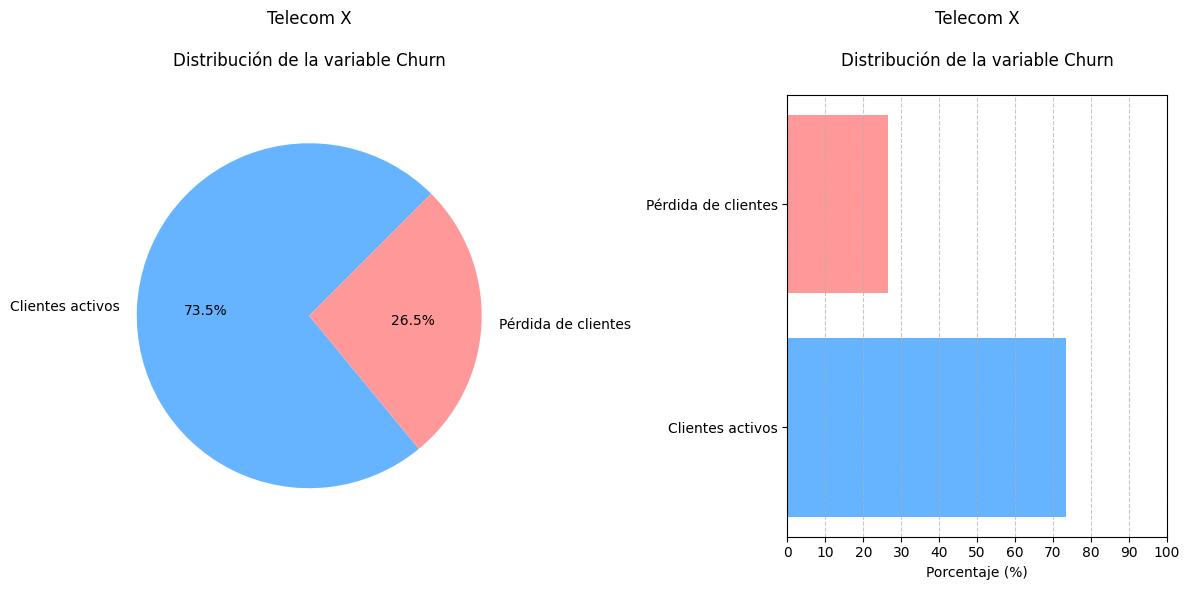

##### Observaciones

Pie: Para mostrar cómo se distribuye un elemento total entre diferentes categorías.

Barh: Para comparar valores entre grupos o mostrar tendencias a lo largo del tiempo.

Ambos gráficos muestran los porcentajes de permanencia y de pérdida de clientes.

Están relacionadas de 75% a 25% apróximadamente, los que indica que de cada 4 clientes, 1 se ha ido.

Según Zoura y Statista las tasas mensual y anual para empresas de telecomunicaciones son del 20% y 2% respectivamente.

Con los datos manejados las estimaciones de estas tasas son:
  * Tasa mensual de churn = 0.82% ( Total de clientes en baja / la suma de los meses)
  * Tasa anual de churn = 9.41% ( 1 - (1 - Tasa mensual de churn) * 12 )

Estos resultados son indicadores favorables de fidelización.

Enlaces de consulta:
https://www.zuora.com/glossary/subscriber-churn/?utm_source=chatgpt.com

https://www.statista.com (Buscar "telecom churn rate")

### Recuento de la evasión por variables categóricas

#### Variables relacionadas con la información personal


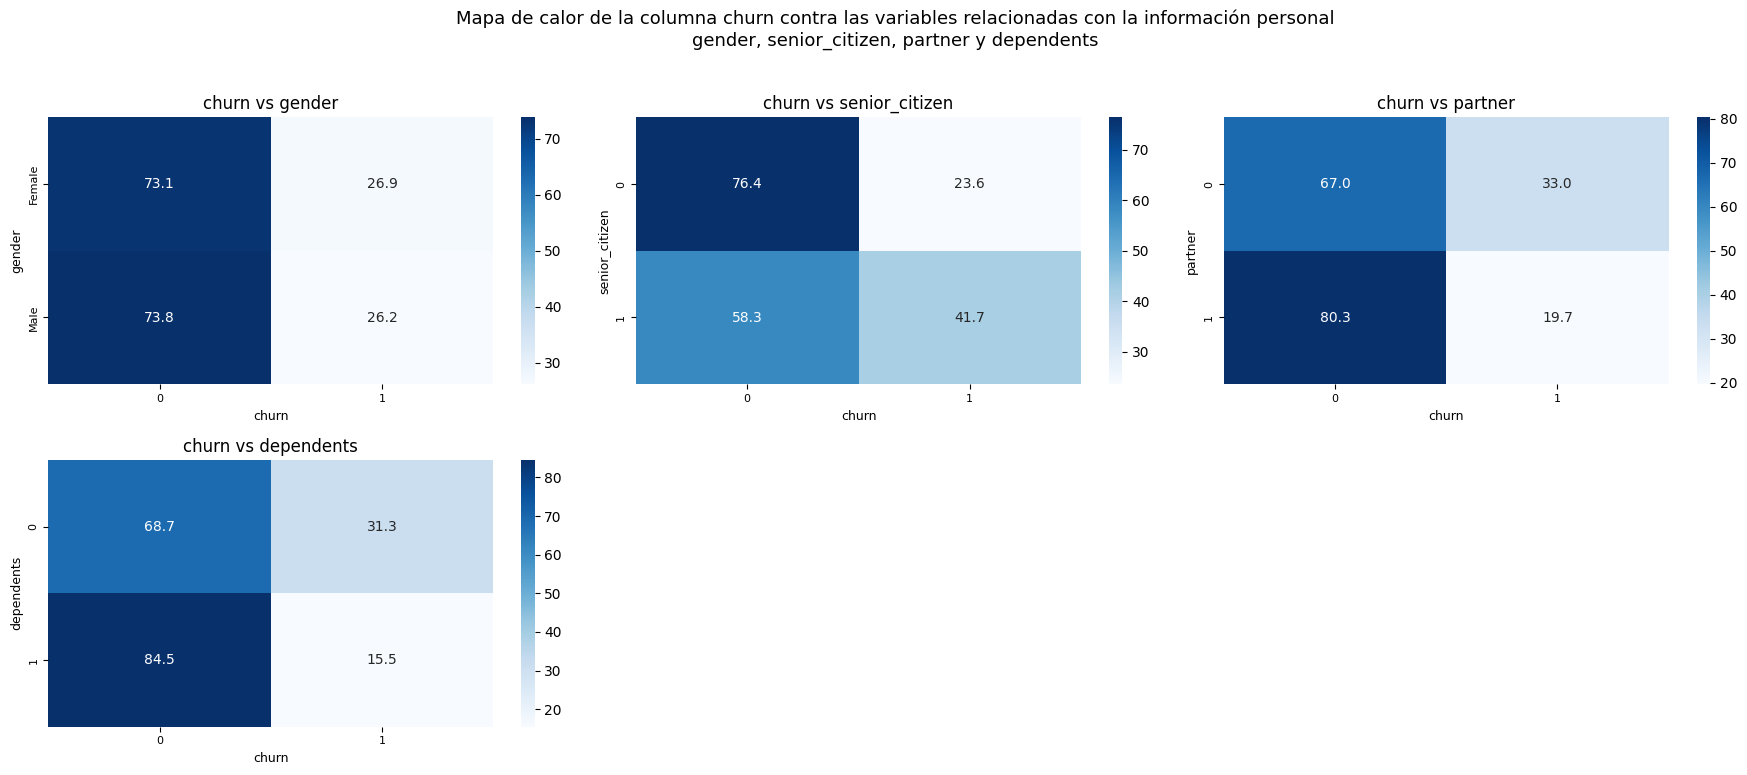

##### Observaciones

Crosstab: Tabla de frecuencia que muestra la distribución conjunta de dos variables categóricas.

Heatmap: Representación gráfica de una tabla donde los valores se muestran con colores según su magnitud.

* churn vs gender

  Poseen una distribución muy similar:
  * Mujeres: 73.1% sin churn, 26.9% con churn.
  * Hombres: 73.8% sin churn, 26.2% con churn.

  No hay una diferencia relevante entre géneros que hagan variar el churn.
  Por tanto, gender no es una variable con la que se pueda estimar o predecir el comportamiento de la variable churn.

* churn vs senior_citizen
  * Menores de 65 años: 76.4% sin churn 23.6% con churn
  * Mayores de 65 años: 58.3% sin churn 41.7% con churn

  Los adultos mayores tienen una tasa de abandono significativamente más alta, lo cual sugiere que senior_citizen, sí está relacionado con churn.

* churn vs partner

  * Sin pareja: 67.0% sin churn 33.0% con churn
  * Con pareja: 80.3% sin churn 19.7% con churn

  Tener pareja ofrece una menor probabilidad de churn, posiblemente por mayor estabilidad o uso y pago compartido de servicios.

* churn vs dependents

  * Sin dependientes: 68.7% sin churn 31.3% con churn
  * Con dependientes: 84.5% sin churn 15.5% con churn

  Tener dependientes reduce significativamente la tasa de abandono. Posiblemente porque las personas con dependientes valoran más la continuidad del servicio.

En resumen, las variables senior_citizen, partner	y dependents incluyen sobre el comportamiento de la variable churn, mientras que genre, no influye de forma apreciable.

#### Variables relativas a los servicios adquiridos


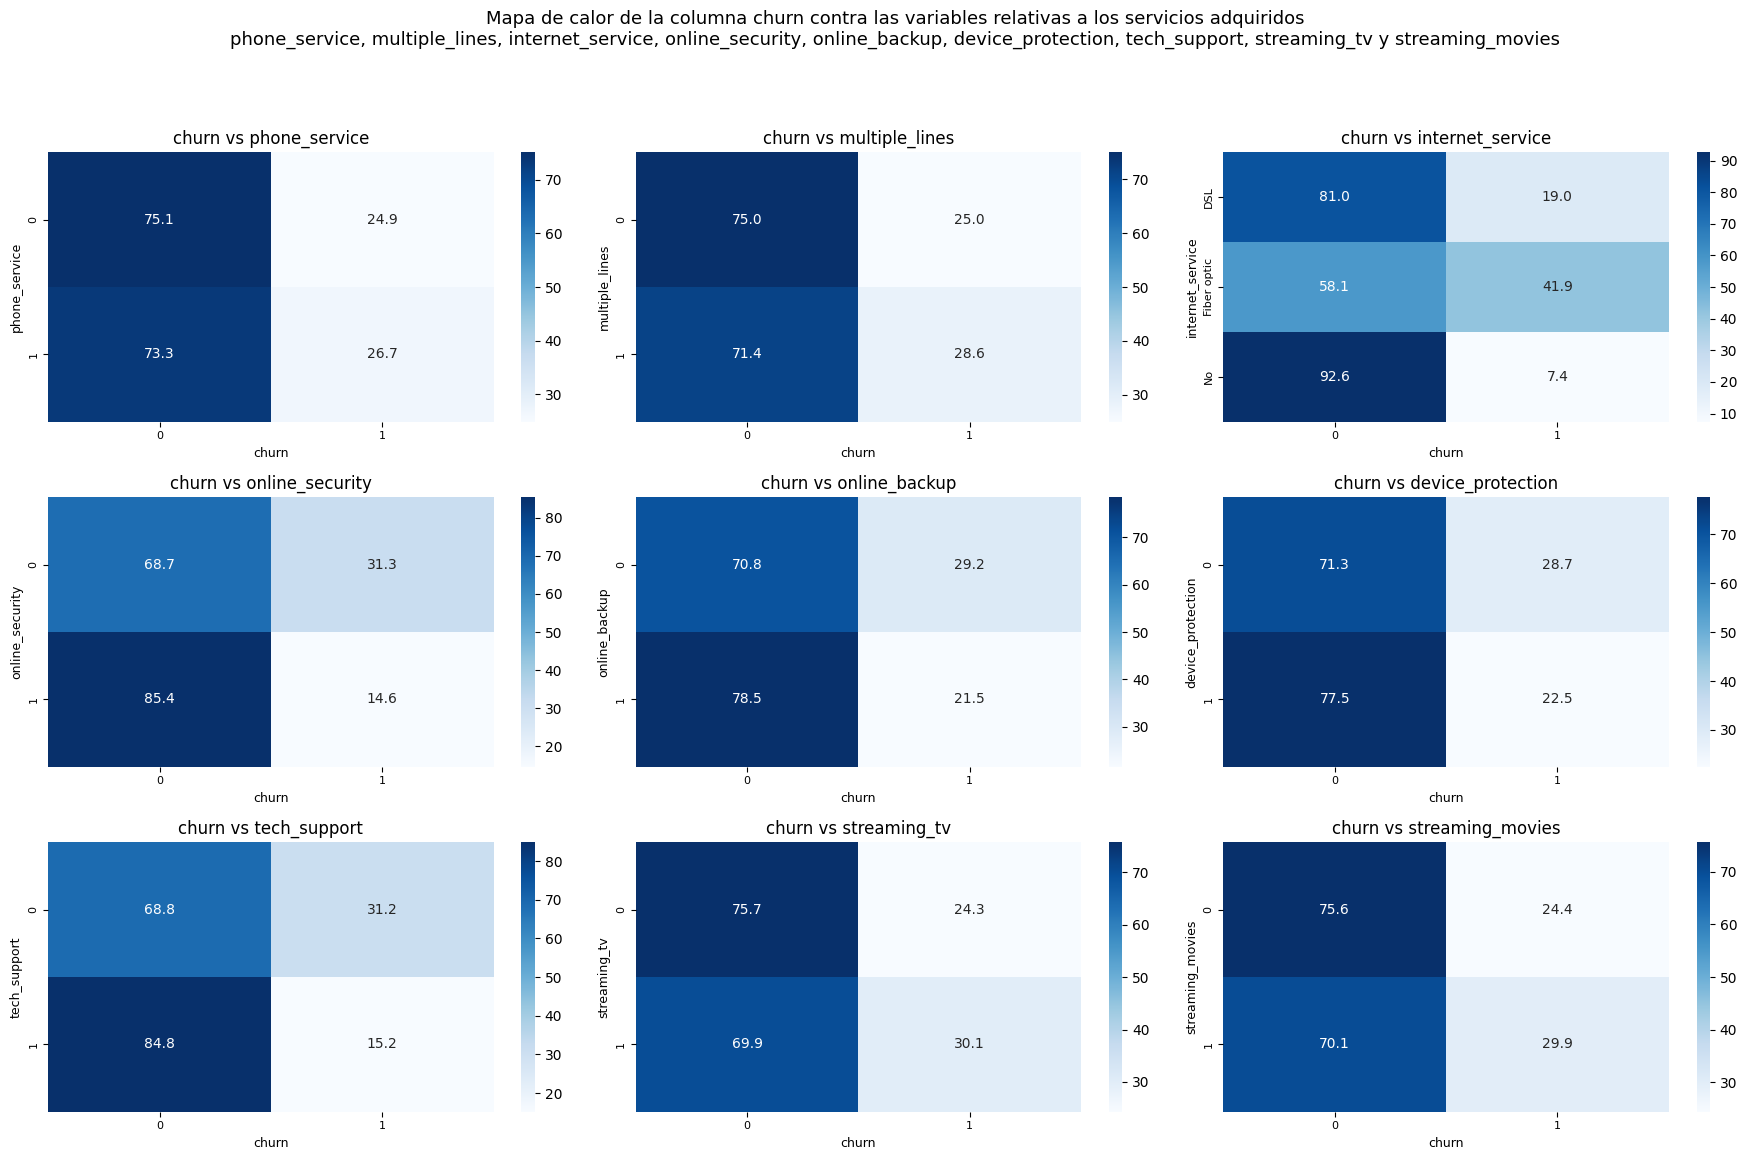

##### Observaciones

Las variables phone_service, multiple_lines, internet_service, online_security, online_backup, device_protection, tech_support, streaming_tv y streaming_movies fueron utilizadas en este análisis.

Crosstab: Tabla de frecuencia que muestra la distribución conjunta de dos variables categóricas.

Heatmap: Representación gráfica de una tabla donde los valores se muestran con colores según su magnitud.

* phone_service

  * Sin servicio: 75.1%, sin churn  24.9% con churn
  * Con servicio: 73.3%, sin churn, 26.7% con churn

  * La similitud entre las tasas de abandono de los clientes con o sin el servicio (26.7% y 24.9%) indica que phone_service no es una variable que afecte al churn de alguna forma.

* multiple_lines

  * Sin servicio: 75.0%, sin churn, 25.0% con churn
  * Con servicio: 71.4%, sin churn, 28.6% con churn

 * Al igual que phone_service, con una diferencia ligeramente por encima del doble (3.6%) las tasas de abandono entre los clientes que poseen o no el servicio es similar y no parece ser un factor fuerte que influya sobre la variable churn.

* internet_service

  * Fiber optic: 58.1%, sin churn, 41.9% con churn
  * DSL: 81.0%, sin churn, 19.0% con churn
  * No internet: 92.6%, sin churn, 7.4% con churn

  Los clientes con fiber optic poseen una tasa de abandono alta del 41.9% mayor que la suma de las tasas de abandono de los clientes con DSL o sin el servicio juntas (26.4%) con una diferencia de 15.5%.
  Los clientes sin el servicio poseen una baja tasa de abandono del 7.4%.

* online_security

  * Sin servicio: 68.7%, sin churn, 31.3% con churn
  * Con servicio: 85.4%, sin churn, 14.6% con churn

  Contratar los servicios de seguridad en línea reduce la tasa de abandono.
  Aumenta la fidelidad al requerir servicios del proveedor.

* online_backup

  * Sin servicio: 70.8%, sin churn, 29.2% con churn
  * Con servicio: 78.5%, sin churn, 21.5% con churn

  Similar a online_security. Contratar el servicio de backup reduce la tasa de abandono. Indica mayor uso y fidelización.

* device_protection

  * Sin servicio: 71.3%, sin churn, 28.7% con churn
  * Con servicio: 77.5%, sin churn, 22.5% con churn

  Tener protección de dispositivo también reduce la tasa de abandono.

* tech_support

  * Sin servicio: 68.8%, sin churn, 31.2% con churn
  * Con servicio: 84.8%, sin churn, 15.2% con churn

  tech_support es la variable de servicios más relevantes para reducir la tasa de abandono. Ella junto con el servicio Fiber optic de la variable internet_service, son los factores que favorecen la permanencia de los clientes.

* streaming_tv

  * Sin servicio: 75.7%, sin churn, 24.3% con churn
  * Con servicio: 69.9%, sin churn, 30.1% con churn

  Los clientes con servicio de TV abandonan con más facilidad. Posiblemente el costo no compensa el servicio recibido y no es percibido como diferenciador por parte de los clientes.

* streaming_movies

  * Sin servicio: 75.6%, sin churn, 24.4% con churn
  * Con servicio: 70.1%, sin churn, 29.9% con churn

  Igual que en streaming_tv, los clientes que utilizan el servicio, poseen la mayor tasa de abandono.


En resumen:
  * Los servicios que reducen la tasa de abandono son:
    * Online security
    * Tech support
    * Device protection
    * Online backup

  * Los servicios que aumentan la tasa de abandono son:
    * Fiber optic internet
    * Streaming TV
    * Streaming movies

  * Los servicio que no afectan el comportamiento de la tasa de abandono son:
    * phone_service
    * Multiple_lines.

Los servicios son buenas herramientas para aumentar la permanencia de los clientes, pero estos, deben satisfacer las necesidades y ofrecer una relación costo / servicio atractiva para todos los clientes que aumenten la contratación y la fidelización con la empresa.

#### Variables relativas a la contratación

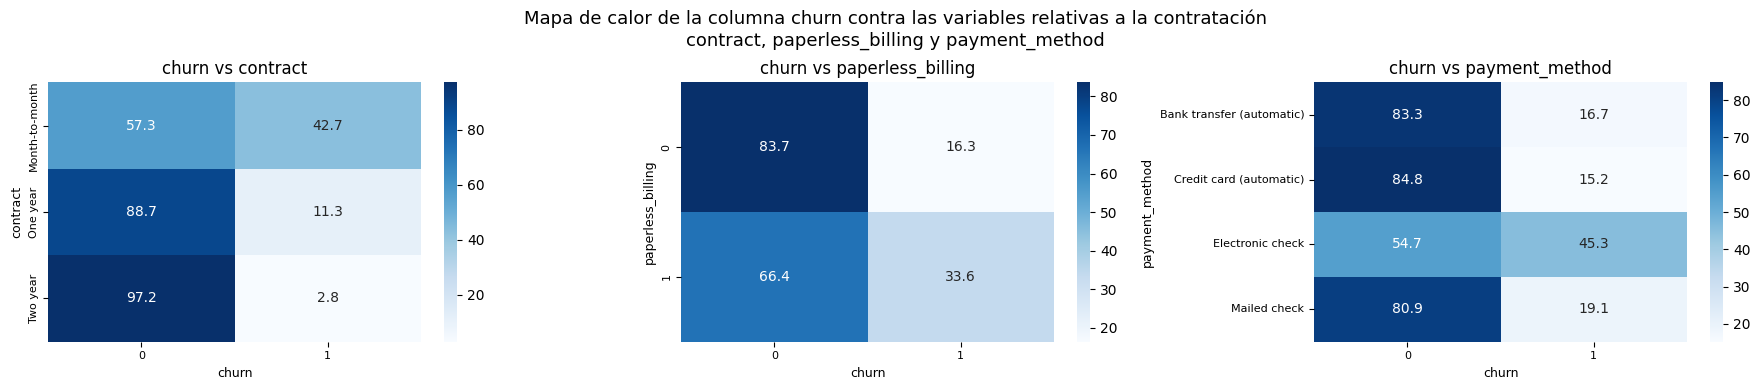

##### Observaciones

Crosstab: Tabla de frecuencia que muestra la distribución conjunta de dos variables categóricas.

Heatmap: Representación gráfica de una tabla donde los valores se muestran con colores según su magnitud.

* churn vs. contract
	* Month-to-month: 57.3% sin churn, 42.7% con churn
	* One year: 88.7% sin churn, 11.3% con churn
	* Two years: 97.2% sin churn, 2.8% con churn

	Los clientes con contratos mensuales son más propensos a abandonar con un 42.7%, los contratos a largo plazo mantienen un porcentaje de abandono aceptable.
	Este parece ser el predictor principal de la variable churn.

* churn vs. paperless_billing

	* Sin servicio: 83.7% sin churn, 16.3% con churn
	* Con servicio: 66.4% sin churn, 33.6% con churn

	Los clientes con facturación electrónica poseen mayor tasa de abandono con un 33.6%.
	Esto puede indicar que el cliente digital, es más exigente o propenso a comparar opciones online.

* churn vs. payment_method
	* Bank transfer (Automatic): 83.3% sin churn, 16.7% con churn
	* Credit card (Automatic): 84.8% sin churn, 15.2% con churn
	* Electronic check: 54.7% sin churn, 45.3% con churn
	* Mailed check: 80.9% sin churn, 19.1% con churn

	Los pagos automáticos están favorablemente ligados a una baja tasa de abandono, pero quienes utilizan el método electronic check, poseen mayor tasa de abandono con un 45.3%.

En resumen el tipo de contrato se convierte en el principal predictor de la variable churn en relación a las variables categóricas, por lo que se debe fomentar la contratación a largo plazo y/o revisar y solucionar los inconvenientes que presenta la contratación mensual.
También deben revisarse las condiciones de los servicios de paperless_billing y payment_method (Electronic check) pues ambos servicios aumentan el abandono por parte de los clientes.

### Distribución de la evasión por variables numéricas

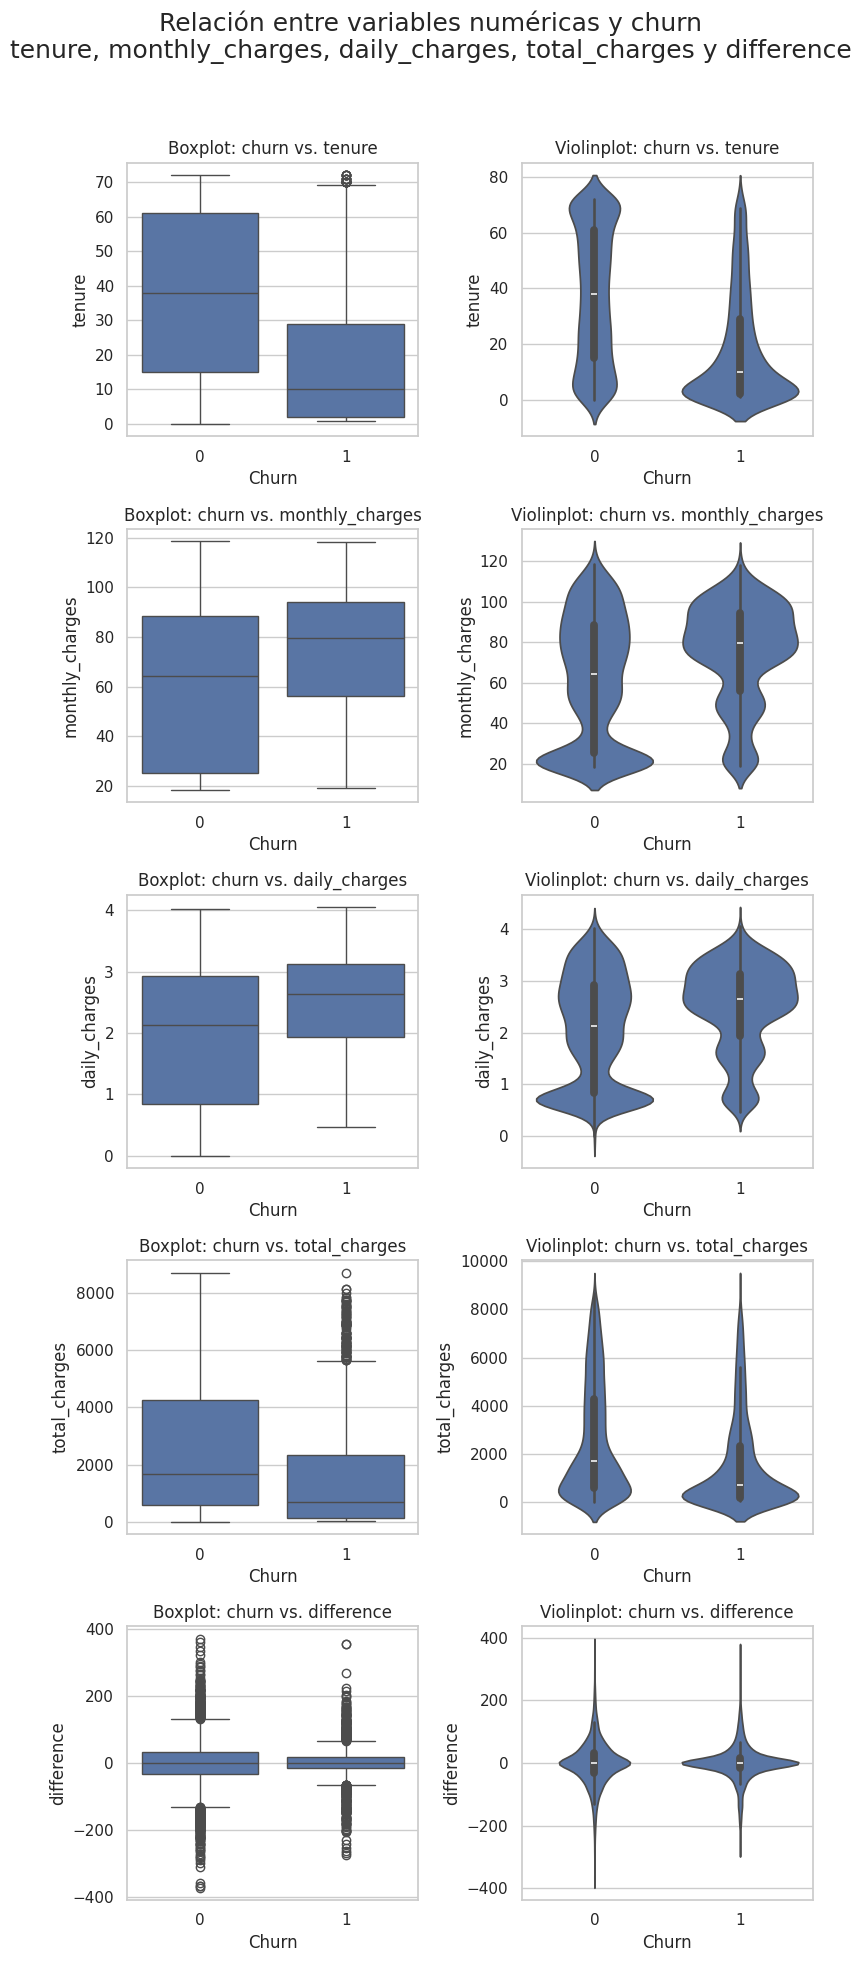

##### Observaciones

Boxplots: Resumen estadístico (mediana, cuartiles, outliers) de cada variable.

Violinplots: Añaden la densidad de probabilidad, mostrando la distribución de los datos dentro de cada grupo.

* churn vs. tenure

    * Los clientes que se quedaron tienen una mediana de permanencia mucho mayor.
    * Los que se fueron tienden a haberse quedado por muy poco tiempo.
    * Distribución más densa cerca de 0 para los clientes que abandonaron, la duración del servicio es un fuerte predictor del churn.
    * Tenure tiene un relación fuerte e inversa con churn.
    
* chrun vs. monthly_charges

    * Los clientes con mayores cargos mensuales parecen tener una ligeramente mayor probabilidad de abandonar.
    * Aunque hay traslape, la mediana de los clientes que abandonan está un poco más alta.
    * Distribuciones más anchas para los clientes que abandonan, sugiere más variabilidad.
    * Monthly charges tiene relación moderada con churn.

* chrun vs. daily_charges

    * Similar al anterior, aunque los valores son más estrechos.
    * Distribuciones muy parecidas, aunque ligeramente más altas para los clientes que abandonan.
    * Sugiere que una carga diaria más alta podría asociarse con abandono, pero el efecto es leve.

* chrun vs. total charges
    * Clientes que permanecieron tienen un total acumulado mucho mayor.
    * los clientes que abandonan, el total tiende a ser más bajo, lo que refuerza que muchos se van temprano.
    * Total charges está fuertemente correlacionado con tenure y también muestra un patrón claro con churn.

* chrun vs. difference

    * El comportamiento entre lo estimado y lo real se comporta de la siguiente manera:
      * Casi simétricamente distribuida en ambos grupos.
      * Ligeramente más dispersa para los clientes que abandonan, aunque no hay un patrón claro.
      * En ambos casos, la mediana es muy cercana a cero lo que indica que es una buena estimación en promedio.
      * La diferencia no parece estar relacionada directamente con churn. Es más útil para verificar la consistencia de los datos que como predictor.

En resumen: Las variables que más afectan el abandono de los clientes son tenure y total_charges. Monthly_charges lo afecta de forma moderada y, daily_charges y difference no aportan ningún criterio que afecte la permanencia o el abandono de los clientes.

### Correlación de variables

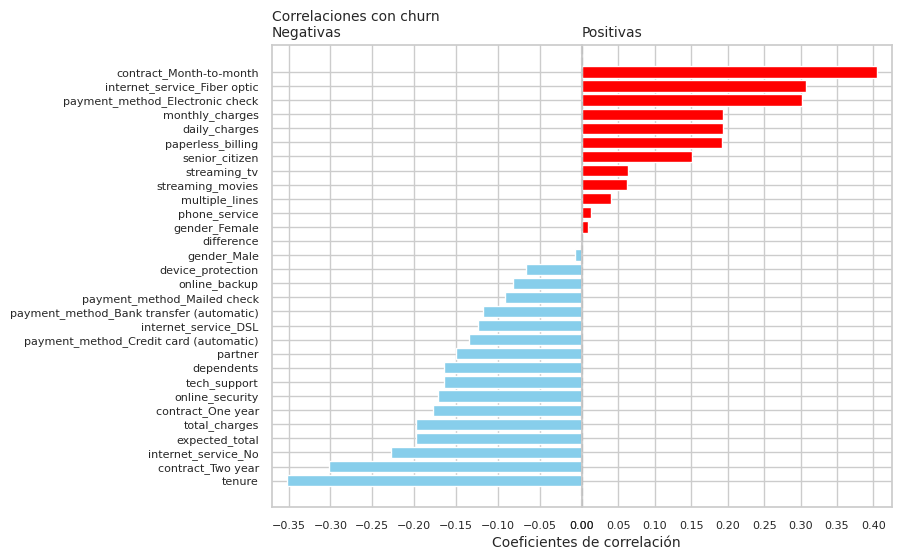

##### Actividades previas

Las columnas categóricas 'gender','internet_service', 'contract' y 'payment_method' fueron convertidas con la función pandas .get_dummys para que se tomaran en cuenta todos sus valores, creando las columnas necesarias para ejecutar la correlación de variables con:

  df_dummies = pd.get_dummies(datos_normalizados, columns=columnas_categoricas, drop_first=False)

Fue eliminada la columna customer_id pues no representa ningún aporte en la correlación. Se ejecutó la instrucción:

  df_dummies = df_dummies.drop(columns=['customer_id'])
  
#### Observaciones

* La correlación positiva indica que la probabilidad de abandono aumenta, en la medida que aumenta la variable. En el gráfico se aprecia que las variables:

  * contract_Month-to-month
  * internet_service_Fiber optic
  * payment_method_Electronic check
  * monthly_charges
  * daily_charges
  * paperless_billing
  * senior_citizen
  * streaming_tv
  * streaming_movies
  * multiple_lines

  presentan un coeficiente de correlación positivo y aquellas con el valor más alto, son las que afectan significativamente el abandono por parte de los clietes.


* La correlación negativa indica la probabilidad de permanencia aumenta, cuando la variable también lo hace. Las variables:

  * tenure
  * contract_Two year
  * internet_service_No
  * expected_total
  * total_charges
  * contract_One year
  * online_security
  * tech_support
  * dependents
  * partner
  * payment_method_Credit card (automatic)
  * internet_service_DSL
  * payment_method_Bank transfer (automatic)
  * payment_method_Mailed check
  * online_backup
  * device_protection

  favorecen la retención de clientes.

* Valores de correlación cercanos a cero, sugieren que no hay una relación lineal fuerte. Las variables:

  * gender_Male
  * difference
  * gender_Female
  * phone_service

  no inciden en el abandono por parte de los clientes.

* Este análisis coincide con lo encontrado en los análisis previos.

## Conclusiones e insights

* Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

* Sobre los datos recibidos

    Nota:

    No se indica la moneda en la que viene expresadas la cantidades relativas a pagos o montos acumulados. Los montos se expresan en la moneda de origen de los datos.

  * Número total de registros: 7043 en todas las columnas.
  * Existen 11 registros con el valor 0 en las columnas total_charges y daily_charges. Estos registros indican que los clientes nuevos, aquellos con menos de un mes de permanencia, no poseen cargos.
  * El promedio de personas mayores de 65 años es de 16.21%.
  * Un promedio del 48.30% de los clientes tienen pareja.
  * Un promedio del 29.96% de los clientes tienen dependientes.
  * Los clientes permanencen un promedio de 32.37 meses.
  * El tiempo mínimo de permanencia es 0 meses y el máximo es de 72 meses o 6 años.
  * El 25% de los clientes tienen menos de 9 meses de antigüedad. Esto puede indicar alta rotación al principio.
  * El 75% de los clientes tiene menos de 55 meses de permanencia. Más de la mitad de los clientes, se pierden antes de los 5 años (4.58 años).
  * Con una desviación de 25.56 tenure se comporta con mucha variabilidad, con clientes de poca permanencia y otros de varios años.
  * Los clientes pagan mensulamente 64.76 en promedio, con un pago mínimo es de 18.25 y máximo de 118.75.
  * El 25% de los clientes pagan mensulamente en promedio 35.50 y mientras el 75% paga 89.85.
  Las tarifas altas se corresponden con paquetes completos. El 75% de los clientes han contratado todos los servicios, mientras que el 50% contratan phone_service y paperless_billing y el 25% solo contrató phone_service.
  *Los clientes han pagado en promedio 2279.73 y como máximo 8684.80. Esto indica una dispersión muy elevada en la variable total_charges, que es casi igual al promedio. Es posible que por los diferentes planes contratados, un cliente que tenga poco tiempo de permanencia, puede haber cancelado lo mismo que otro con más tiempo.
  * El cliente prefiere mantener los servicios básicos.
    * phone_service 90.31%
    * paperless_billing	59.22%
    * multiple_lines 42.18**
    * streaming_movies	38.79%
    * streaming_tv	38.43%
    * tech_support	29.02%
    * device_protection	34.38%
    * online_backup	34.48%
    * online_security	28.66%
  * El promedio de la diferencia<sup>1 </sup> entre el valor acumulado esperado y el valor acumulado ( difference = expected_total - total_charges ) de -15.30% indica que los clientes pagan menos de los esperado en sus cargos totales.
  * Los percentiles de la variable difference indican que el 25% de los clientes paga menos de lo esperado con una diferencia de -28.50.
  * La mitad de los clientes pagan exactamente lo que deben pagar.
  * El 75% de los clientes están pagando más de lo esperado, con una diferencia de 28.60.
  * Las cifras que muestran los percentiles parecen simétricas alrededor del valor 0 perteneciente al 50% de los clientes. Puede tener origen en errores de facturación, en ajustes a los servicios contratados o pagos vencidos.
  
* Tasa de churn de clientes

  El set de datos entregados mustran una tasa de pérdida de clientes del 26.5%, pero, en comparación con la taza de permanencia indica que, mas de 1/4 de los clientes dejan la compañía, es decir, de cada 4 clientes que contratan servicios, 1 los abandona.

  Comparando esta tasa con lo expuesto por Zoura<sup>2 </sup> y Statista<sup>3 </sup> para empresas de telecomunicaciones, parece una tasa de churn elevada, pero se debe recordar que los datos manejados no poseen rangos de fechas que nos permitan establecer la tasa mensual y anual por períodos, por lo que esta comparación no tiene efecto.

  * Según Zoura y Statista las tasas mensual y anual para empresas de telecomunicaciones son del 2% y 20% respectivamente. Valores superiores a los indicados, son alcanzables en mercados menos maduros.

  Al calcular las tasas de churn<sup>4 </sup> para el set de datos entregado, estimando la probabilidad de permanencia obtenemos que:

   Tasa mensual de churn = 0.82%

   Tasa anual de churn = 9.41%

  La comparación de estas tasas con la estadística permitiría concluir que existe una sólida retención de clientes tanto mensual como anualmente.

  Las tasas calculadas aquí, tienen las siguientes limitaciones:
     * No considera cuánto tiempo estuvo cada cliente.
     * Trata por igual a los clientes indistintamente del tiempo de permanencia.
     * No permite identificar cuándo ocurren más bajas.
     * Supone una tasa constante a lo largo del tiempo.
         

* Incidencia sobre la tasa churn

  * Los adultos mayores tienen una tasa de abandono significativamente alta (41.7%),
  * Tener pareja y tener dependientes ofrece una menor probabilidad de churn con 80.3% y 84.5% de permanencia. Posiblemente relacionado una mayor estabilidad o, uso y pago compartido de servicios.
  * En resumen, las variables partner y dependents influyen positivamente en la permanencia de los clientes. La variable senior_citizen por el contrario aumenta la posibilidad de abandono. La variable genre no influye de forma apreciable sobre la permanencia del cliente.
  *  Los servicios que reducen la tasa de abandono son:
    * Online security
    * Tech support
    * Device protection
    * Online backup
  * Los servicios que aumentan la tasa de abandono son:
    * Fiber optic internet
    * Streaming TV
    * Streaming movies
  * Los servicio que no afectan el comportamiento de la tasa de abandono son:
    * phone_service
    * Multiple_lines.
  * Los clientes con contratos mensuales son más propensos a abandonar con un 42.7%, los contratos a largo plazo mantienen un porcentaje de abandono aceptable.
	* Este parece ser el predictor principal de la variable churn.
  * Los clientes con facturación electrónica poseen mayor tasa de abandono con un 33.6%.
  * Los pagos automáticos están favorablemente ligados a una baja tasa de abandono, pero quienes utilizan el método electronic check, poseen mayor tasa de abandono con un 45.3%.
  * Los clientes que abandonan, lo hacen al poco tiempo.
  * La duración del servicio es un fuerte predictor del churn.
  * La variable tenure tiene un relación fuerte e inversa con churn.
  * Los clientes con mayores cargos mensuales parecen tener una mayor probabilidad de abandonar.
  * Aunque hay traslape, la mediana de los clientes que abandonan está un poco más alta.
  * La variable monthly_charges tiene relación moderada con churn.
  * Se aprecia que una carga diaria más alta podría asociarse con abandono, pero el efecto es leve.
  * La variable daily_charges tiene relación moderada con churn.
  * Clientes que permanecieron tienen un total acumulado mucho mayor.
  * Los clientes que abandonan, el total tiende a ser más bajo, lo que refuerza que muchos se van temprano.
  * La variable total_charges está fuertemente correlacionada con  la variable tenure y también muestra un patrón claro con churn.
  * La variable difference no parece influir directamente con churn. Es más útil para verificar la consistencia de los datos que como predictor.
    * Su distribución es casi simétricamente ambos grupos, más hacia los clientes que abandonan, aunque no hay un patrón claro. Su mediana en ambos casos es muy cercana a cero, lo que indica que es una buena estimación en promedio.

  * Los resultados obtenidos durante la fase de Carga y Análisis coinciden con los resultados obtenidos en la correlación de variables

* En resumen:

  * La probabilidad de abandono aumenta con el aumento de las variables siguientes: (En orden de importancia)

    * contract_Month-to-month
    * internet_service_Fiber optic
    * payment_method_Electronic check
    * monthly_charges
    * daily_charges
    * paperless_billing
    * senior_citizen
    * streaming_tv
    * streaming_movies
    * multiple_lines

    Con respecto a la variable churn presentan un coeficiente de correlación  positivo y aquellas con el valor más alto, son las que afectan significativamente el abandono por parte de los clietes.

  * Las variables que disminuyen la probabilidad de abandono y que aumentan la probabilidad de permanencia son: (En orden de importancia)

    * tenure
    * contract_Two year
    * internet_service_No
    * expected_total
    * total_charges
    * contract_One year
    * online_security
    * tech_support
    * dependents
    * partner
    * payment_method_Credit card (automatic)
    * internet_service_DSL
    * payment_method_Bank transfer (automatic)
    * payment_method_Mailed check
    * online_backup
    * device_protection

    Sus coeficientes de correlación negativos con la variable churn, indican que  la probabilidad de permanencia aumenta, cuando la variable también lo hace.

  * Las variables que no influyen sobre el comportamiento de la variable churn son:

    * gender_Male
    * difference
    * gender_Female
    * phone_service

    Los coeficientes de correlación con la variable churn son cercanos a cero y sugieren que no hay una relación lineal fuerte.


***


<sup>1 </sup> Las variables expected_total y difference se crearon para estudiar la posibilidad de irregularidades en el valor acumulado en total_charges. Su información no fue provista en los datos enviados.

<sup>2 </sup>https://www.zuora.com/glossary/subscriber-churn/?utm_source=chatgpt.com

<sup>3 </sup>https://www.statista.com (Buscar "telecom churn rate")

<sup>4 </sup>  Estimación de tasas churn
* Tasa mensual de churn = ( Total de clientes en baja / la suma de los meses)

* Tasa anual de churn = ( 1 - (1 - Tasa mensual de churn) ^ 12 )

## Recomendaciones

* Ofrece sugerencias estratégicas basadas en tu análisis.

* Es claro que deben ajustarse los planes de contratación para hacer que el contrato mensual sea atractivo para los clientes o estudiar su eliminación.
* También es lógico promover la contratación a largo plazo, con ofertas y beneficios que los clientes encuentren atractivos.
* Ofrecer planes para grupos familiares, ya que los clientes con pareja y dependientes favorecen la permanencia.
* Los planes pueden incluir beneficios y ofertas según el tipo de grupo familiar, sí tienen hijos, o inclusive, la creación de cuentas corporativas para más de un grupo familiar, con un tiempo mínimo de permanencia de 1 año.
* Estudiar la posibilidad de crear un plan para mayores de 65 años, verficando o corrigiendo las causas que hacen que este segmento abandone.
* Como muchos de los clientes abandonan al poco tiempo de la contratación, los planes para nuevos clientes, puedenn Ofrecer promociones, descuentos o cash back durante el primer año por lo menos.
* EL impacto de la carga diaria y mensual es moderado, pero es prudente reconsiderar las tarifas y ajustarlas al mercado sí, no lo están. En este punto, las mejoras que se hagan en la plataforma de servicios, serán vistas por el cliente como un signo de mejora y fidelización.
* También es prudente revisar la tasa de error de facturación, para mejorar el servicio prestado al cliente.
* Es necesario verificar qué influye, para que los clientes con servicio de Internet con fibra óptica prefieran cancelar la contratación en lugar de cambiar a una conexión DSL. Históricamente, el servicio por DSL es de menor calidad y velocidad que el de fibra óptica, pero los datos indican que los clientes con el servicio DSL poseen una tasa de permanencia muy alta. Lo que puede indicar esto es que, la relación costo beneficio, no es la adecuada para el servicio que ofrece la fibra óptica. Es prudente revisar los costos y beneficios que el servicio ofrece y realizar las mejoras técnicas que a bien deban realizarse.
* También debe verificarse que problemas puede presentar la plataforma de pagos con el tipo de pago Electronic check. La verificación puede incluir la aplicación del proveedor, las indicaciones para su uso y la porción de la plataforma que pertenece a la entidad financiera o sustituir este tipo de pago por alguno de los que ya aumenta la permanencia.
* Incentivar y mejorar los servicios de Online security, Tech support, Device protection y Online backup, porque ellos promueven la permanencia.
* Verificar y corregir en todo sentido, las causas que ocacionan que los servicios de Fiber optic (internet_service), Paperless billing,  Streaming de tv y Streaming de películas no sean del agrado de los clientes y promuevan el abandono.
